#### **DEPURACIÓN DE LOS DATOS**

A partir de aquí vamos a hacer una investigación profunda en nuestros datos. Realizaremos varias transformaciones para poder extraer la máxima información posible de nuestro modelo.

Una parte importante también es la de aplicar toda las transformaciones al Test simultaneamente. De otra manera, no podríamos aplicarle nuestro modelo final.

### 1) Lectura e Inspección de Datos

In [1]:
import pandas as pd
import numpy as np

from NuestrasFunciones import *
import NuestrasFunciones 

#pd.set_option("display.max_rows", None, "display.max_columns", None)

# Lectura de datos
clientes = pd.read_csv(r'C:\Users\sixto\OneDrive\Escritorio\MASTER_DATA_SCIENCE\7. MINERIA_MODELIZACION\Competicion\FugaClientes_Training.csv')
clientes.head()

,ID,Genero,Mayor65,Conyuge,PersCargo,Antig.fc.edad,Telf_serv,VariasLineas,Int_serv,Seguridad,...,Antivirus_disp,Soporte_tecnico,TV_streaming,Peliculas,Contrato,Fact_sinPapel,MetodoPago,FacturaMes,FacturaTotal,Fuga
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,NaN,NaN,29.85,0
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,NaN,1889.50,0
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,NaN,0.0,No,No,45.0,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,NaN,42.30,1840.75,0
4,9237-HQITU,Female,0.0,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [2]:
test = pd.read_csv(r'C:\Users\sixto\OneDrive\Escritorio\MASTER_DATA_SCIENCE\7. MINERIA_MODELIZACION\Competicion\FugaClientes_Test.csv')
test.head()

,ID,Genero,Mayor65,Conyuge,PersCargo,Antiguedad,Telf_serv,VariasLineas,Int_serv,Seguridad,CopiaSeguridad,Antivirus_disp,Soporte_tecnico,TV_streaming,Peliculas,Contrato,Fact_sinPapel,MetodoPago,FacturaMes,FacturaTotal
0,4183-MYFRB,Female,0,No,No,21,Yes,No,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,90.05,1862.90
1,8779-QRDMV,Male,1,No,No,1,No,No,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65
2,1680-VDCWW,Male,0,Yes,No,12,Yes,No,No,No,No,No,No,No,No,One year,No,Bank transfer (automatic),19.80,202.25
3,6234-RAAPL,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,No,Yes,Yes,No,Two year,No,Bank transfer (automatic),99.90,7251.70
4,9867-JCZSP,Female,0,Yes,Yes,17,Yes,No,No,No,No,No,No,No,No,One year,No,Mailed check,20.75,418.25


Comprobamos si el **nombre de las columnas** coinciden o no. 

In [3]:
clientes.columns

Index(['ID', 'Genero', 'Mayor65', 'Conyuge', 'PersCargo', 'Antig.fc.edad',
       'Telf_serv', 'VariasLineas', 'Int_serv', 'Seguridad', 'CopiaSeguridad',
       'Antivirus_disp', 'Soporte_tecnico', 'TV_streaming', 'Peliculas',
       'Contrato', 'Fact_sinPapel', 'MetodoPago', 'FacturaMes', 'FacturaTotal',
       'Fuga'],
      dtype='object')

In [4]:
test.columns

Index(['ID', 'Genero', 'Mayor65', 'Conyuge', 'PersCargo', 'Antiguedad',
       'Telf_serv', 'VariasLineas', 'Int_serv', 'Seguridad', 'CopiaSeguridad',
       'Antivirus_disp', 'Soporte_tecnico', 'TV_streaming', 'Peliculas',
       'Contrato', 'Fact_sinPapel', 'MetodoPago', 'FacturaMes',
       'FacturaTotal'],
      dtype='object')

In [5]:
#Verificar si las columnas de los DataFrames son iguales
columnas_iguales = clientes.columns.equals(test.columns)

# Imprimir el resultado
if columnas_iguales:
    print("Las columnas son iguales en ambos DataFrames.")
else:
    print("Las columnas no son iguales en ambos DataFrames.")

Las columnas no son iguales en ambos DataFrames.


In [6]:
# Obtener columnas que están en clientes pero no en test
columnas_unicas_clientes = set(clientes.columns) - set(test.columns)

# Obtener columnas que están en test pero no en clientes
columnas_unicas_test = set(test.columns) - set(clientes.columns)

# Imprimir los resultados
print("Columnas en clientes pero no en test:", columnas_unicas_clientes)
print("Columnas en test pero no en clientes:", columnas_unicas_test)


Columnas en clientes pero no en test: {'Fuga', 'Antig.fc.edad'}
Columnas en test pero no en clientes: {'Antiguedad'}


Cambio el nombre de la columna **Antig.fc.edad** a **Antiguedad** en mi trainning

In [7]:
clientes.rename(columns={'Antig.fc.edad': 'Antiguedad'}, inplace=True)

In [8]:
# Obtener columnas que están en clientes pero no en test
columnas_unicas_clientes = set(clientes.columns) - set(test.columns)

# Obtener columnas que están en test pero no en clientes
columnas_unicas_test = set(test.columns) - set(clientes.columns)

# Imprimir los resultados
print("Columnas en clientes pero no en test:", columnas_unicas_clientes)
print("Columnas en test pero no en clientes:", columnas_unicas_test)

Columnas en clientes pero no en test: {'Fuga'}
Columnas en test pero no en clientes: set()


Como era de esperar, ya la única columna que no nos coincide es **Fuga**

In [9]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6353 entries, 0 to 6352
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               6353 non-null   object 
 1   Genero           6001 non-null   object 
 2   Mayor65          6001 non-null   float64
 3   Conyuge          6353 non-null   object 
 4   PersCargo        6353 non-null   object 
 5   Antiguedad       5959 non-null   float64
 6   Telf_serv        6261 non-null   object 
 7   VariasLineas     6353 non-null   object 
 8   Int_serv         6163 non-null   object 
 9   Seguridad        6353 non-null   object 
 10  CopiaSeguridad   6353 non-null   object 
 11  Antivirus_disp   6353 non-null   object 
 12  Soporte_tecnico  6353 non-null   object 
 13  TV_streaming     6353 non-null   object 
 14  Peliculas        6353 non-null   object 
 15  Contrato         5959 non-null   object 
 16  Fact_sinPapel    6092 non-null   object 
 17  MetodoPago    

![Fig1. Data description](Cuadro.png)

In [10]:
# Lista de columnas con menos de 10 valores distintos. Potenciales factores!
to_factor = list(clientes.loc[:,clientes.nunique() <= 10]);  

# Podemos cambiar el tipo de todas ellas a factor de una vez
clientes[to_factor] = clientes[to_factor].astype('category')

In [11]:
# Lista de columnas con menos de 10 valores distintos. Potenciales factores!
to_factor = list(test.loc[:,test.nunique() <= 10]);  

# Podemos cambiar el tipo de todas ellas a factor de una vez
test[to_factor] = test[to_factor].astype('category')

In [12]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6353 entries, 0 to 6352
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ID               6353 non-null   object  
 1   Genero           6001 non-null   category
 2   Mayor65          6001 non-null   category
 3   Conyuge          6353 non-null   category
 4   PersCargo        6353 non-null   category
 5   Antiguedad       5959 non-null   float64 
 6   Telf_serv        6261 non-null   category
 7   VariasLineas     6353 non-null   category
 8   Int_serv         6163 non-null   category
 9   Seguridad        6353 non-null   category
 10  CopiaSeguridad   6353 non-null   category
 11  Antivirus_disp   6353 non-null   category
 12  Soporte_tecnico  6353 non-null   category
 13  TV_streaming     6353 non-null   category
 14  Peliculas        6353 non-null   category
 15  Contrato         5959 non-null   category
 16  Fact_sinPapel    6092 non-null   category


In [13]:
clientes.nunique()

ID                 6353
Genero                2
Mayor65               2
Conyuge               2
PersCargo             2
Antiguedad           73
Telf_serv             2
VariasLineas          2
Int_serv              3
Seguridad             2
CopiaSeguridad        2
Antivirus_disp        2
Soporte_tecnico       2
TV_streaming          2
Peliculas             2
Contrato              3
Fact_sinPapel         2
MetodoPago            4
FacturaMes         1522
FacturaTotal       5923
Fuga                  2
dtype: int64

#### **Separación de Variables**

In [14]:
# Separar la variable objetivo
varObj = clientes['Fuga']

# Crear el dataset de entrada sin 'Fuga' ni 'ID'
imput = clientes.drop(columns=['Fuga', 'ID'])

# Separar las variables categóricas, excluyendo 'Fuga' e 'ID'
categoricas = imput.select_dtypes(include=['category'])

# Separar las variables numéricas
numericas = imput.select_dtypes(include=[np.number])

#### **Inspección Variables Categóricas con Fuga**

In [15]:
# Columnas a excluir
exclude_columns = ['ID','Antiguedad', 'FacturaMes', 'FacturaTotal']

# Iterar sobre todas las columnas y mostrar value_counts para las que no están en exclude_columns
for column in clientes.columns:
    if column not in exclude_columns:
        print(f"Value counts for {column}:")
        value_counts = clientes[column].value_counts()
        print(value_counts)
        print(f"Number of nulls in {column}: {clientes[column].isnull().sum()}")
        
        # Calcular proporciones
        total_count = value_counts.sum()
        proportions = value_counts / total_count
        
        # Imprimir proporciones
        print(f"Proportions for {column}:")
        for value, proportion in proportions.items():
            print(f"{value}: {proportion:.2%}")
        
        # Verificar si está balanceado
        max_proportion = proportions.max()
        min_proportion = proportions.min()
        balance_ratio = max_proportion / min_proportion if min_proportion != 0 else float('inf')
        
        print(f"Balance ratio for {column}: {balance_ratio:.2f}")
        if balance_ratio > 1.5:  # Puedes ajustar este umbral según tu criterio
            print(f"{column} is unbalanced.")
        else:
            print(f"{column} is balanced.")
        
        print("\n")

Value counts for Genero:
Genero
Male      3038
Female    2963
Name: count, dtype: int64
Number of nulls in Genero: 352
Proportions for Genero:
Male: 50.62%
Female: 49.38%
Balance ratio for Genero: 1.03
Genero is balanced.


Value counts for Mayor65:
Mayor65
0.0    5045
1.0     956
Name: count, dtype: int64
Number of nulls in Mayor65: 352
Proportions for Mayor65:
0.0: 84.07%
1.0: 15.93%
Balance ratio for Mayor65: 5.28
Mayor65 is unbalanced.


Value counts for Conyuge:
Conyuge
No     3287
Yes    3066
Name: count, dtype: int64
Number of nulls in Conyuge: 0
Proportions for Conyuge:
No: 51.74%
Yes: 48.26%
Balance ratio for Conyuge: 1.07
Conyuge is balanced.


Value counts for PersCargo:
PersCargo
No     4439
Yes    1914
Name: count, dtype: int64
Number of nulls in PersCargo: 0
Proportions for PersCargo:
No: 69.87%
Yes: 30.13%
Balance ratio for PersCargo: 2.32
PersCargo is unbalanced.


Value counts for Telf_serv:
Telf_serv
Yes    5656
No      605
Name: count, dtype: int64
Number of nulls in

Voy variable a variable:

-**Genero**: bien equilibrada. Algunos nulos.

-**Mayor65**: tiende a 0 en proporción 5. Algunos nulos. 

-**Conyuge**: Equilibrada. No nulos

-**PersCargo**: No equilibrada, tiende a "No" 2.3. No nulos

-**Telf_serv**: No equilibrada, tiende a "Yes" 9. Pocos nulos

-**VariasLineas**: casi equilibrada, mas a "No" 1.3, sin nulos. 

-**Int_serv**: 3 categorías, tiende algo mas a fibra. Pocos nulos.

-**Seguridad**: tendencia a No 2.4, sin nulos. 

-**CopiaSeguridad**: Tiende a "No" 2. Sin nulos

-**Antivirus_disp**: tiende a "NO" 2. Sin nulos

-**Soporte_tecnico**:tiende a "No" 2.4. Sin nulos. 

-**TV_streaming**: tiende a "No" 1.6 Sin nulos. 

-**Peliculas**: tiene a No a 1.59. Sin nulos. 

-**Contrato**: tres categorías. La mitad mes a mes, luego equilibrio de las otras dos. Algunos nulos

-**Fact_sinPapel**: Tiende a Yes 1.4. Algunos nulos

-**MetodoPago**: 4 categorías, bien equilibradas. 400 nulos. 

-**Fuga**: Más 0, 2.7. Sin nulos


Ahora voy a medir de cada categórica su **Relación con Fuga**:

In [16]:
import scipy.stats as stats

# Columnas a excluir para el análisis de relación con 'Fuga'
exclude_columns = ['Antiguedad', 'FacturaMes', 'FacturaTotal', 'ID']

# Lista para almacenar las tablas de relación
relation_tables = []

# Función para crear la tabla de relación y calcular el porcentaje de 0 sobre 1
def create_relation_table(df, col, target):
    # Crear tabla de contingencia
    contingency_table = pd.crosstab(df[col], df[target])
    
    # Calcular el porcentaje de 0 sobre 1
    contingency_table['Permanencia'] = (contingency_table[0] / contingency_table[1]).round(2)
    
    return contingency_table

# Generar la tabla de relación para cada columna excluida
for column in clientes.columns:
    if column not in exclude_columns and column != 'Fuga':
        relation_table = create_relation_table(clientes, column, 'Fuga')
        relation_tables.append((column, relation_table))

# Mostrar las tablas de relación
for col, table in relation_tables:
    print(f"\nRelación entre {col} y Fuga:")
    display(table)


Relación entre Genero y Fuga:


Fuga,0,1,Permanencia
Genero,,,
Female,2162,801,2.70
Male,2242,796,2.82



Relación entre Mayor65 y Fuga:


Fuga,0,1,Permanencia
Mayor65,,,
0.0,3840,1205,3.19
1.0,562,394,1.43



Relación entre Conyuge y Fuga:


Fuga,0,1,Permanencia
Conyuge,,,
No,2197,1090,2.02
Yes,2470,596,4.14



Relación entre PersCargo y Fuga:


Fuga,0,1,Permanencia
PersCargo,,,
No,3051,1388,2.20
Yes,1616,298,5.42



Relación entre Telf_serv y Fuga:


Fuga,0,1,Permanencia
Telf_serv,,,
No,454,151,3.01
Yes,4147,1509,2.75



Relación entre VariasLineas y Fuga:


Fuga,0,1,Permanencia
VariasLineas,,,
No,2766,921,3.00
Yes,1901,765,2.48



Relación entre Int_serv y Fuga:


Fuga,0,1,Permanencia
Int_serv,,,
DSL,1728,394,4.39
Fiber optic,1572,1130,1.39
No,1238,101,12.26



Relación entre Seguridad y Fuga:


Fuga,0,1,Permanencia
Seguridad,,,
No,3107,1425,2.18
Yes,1560,261,5.98



Relación entre CopiaSeguridad y Fuga:


Fuga,0,1,Permanencia
CopiaSeguridad,,,
No,2951,1229,2.40
Yes,1716,457,3.75



Relación entre Antivirus_disp y Fuga:


Fuga,0,1,Permanencia
Antivirus_disp,,,
No,2982,1198,2.49
Yes,1685,488,3.45



Relación entre Soporte_tecnico y Fuga:


Fuga,0,1,Permanencia
Soporte_tecnico,,,
No,3104,1405,2.21
Yes,1563,281,5.56



Relación entre TV_streaming y Fuga:


Fuga,0,1,Permanencia
TV_streaming,,,
No,2972,964,3.08
Yes,1695,722,2.35



Relación entre Peliculas y Fuga:


Fuga,0,1,Permanencia
Peliculas,,,
No,2943,959,3.07
Yes,1724,727,2.37



Relación entre Contrato y Fuga:


Fuga,0,1,Permanencia
Contrato,,,
Month-to-month,1873,1412,1.33
One year,1123,138,8.14
Two year,1376,37,37.19



Relación entre Fact_sinPapel y Fuga:


Fuga,0,1,Permanencia
Fact_sinPapel,,,
No,2077,406,5.12
Yes,2393,1216,1.97



Relación entre MetodoPago y Fuga:


Fuga,0,1,Permanencia
MetodoPago,,,
Bank transfer (automatic),1063,220,4.83
Credit card (automatic),1104,186,5.94
Electronic check,1082,890,1.22
Mailed check,1077,259,4.16


**Variables que van afectar a Fuga**: 

-Mayor65  
-Conyuge  
-PersCargo  
-Int_serv  
-Seguridad  
-Soporte_tecnico  
-**Contrato**  
-**Fact_sinPapel**  
-**MetodoPago**

**Variables que NO van afectar a Fuga**: 

-Género  
-Telf_serv  
-VariasLineas  
-CopiaSeguridad
-TV_streaming
-Peliculas


#### **Inspección Variables Numéricas con Fuga**

Sobre todo FacturaMes y Antiguedad muy importantes

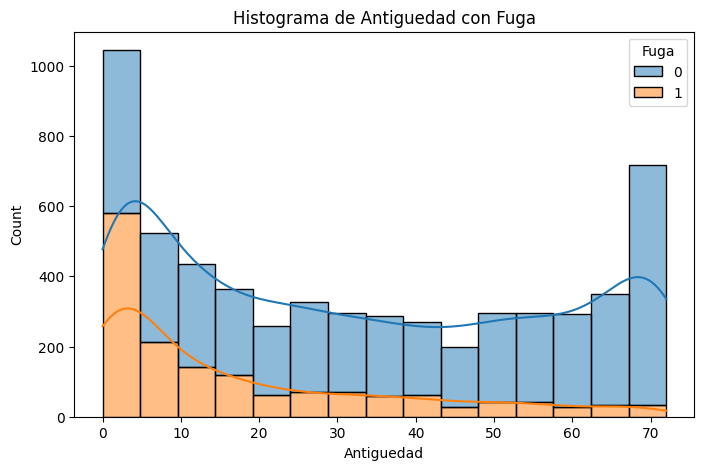

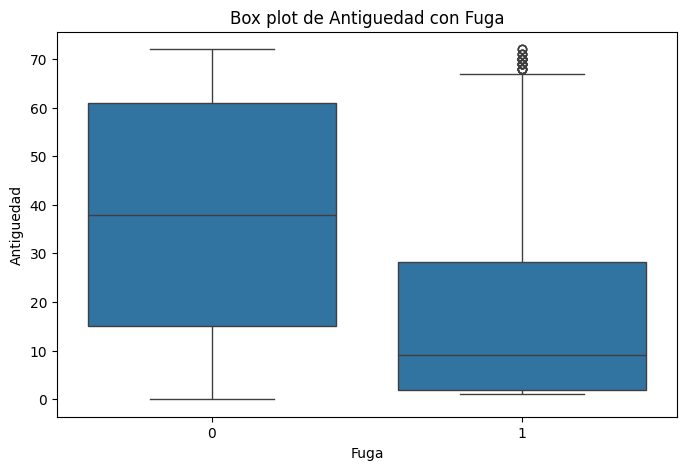

C:\Users\sixto\AppData\Local\Temp\ipykernel_128476\444022137.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proportion_df = cleaned_df.groupby(bins)[target].mean().reset_index()


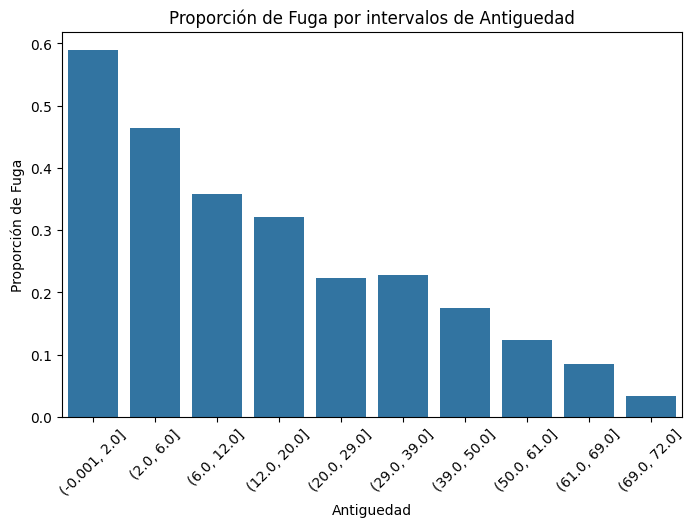

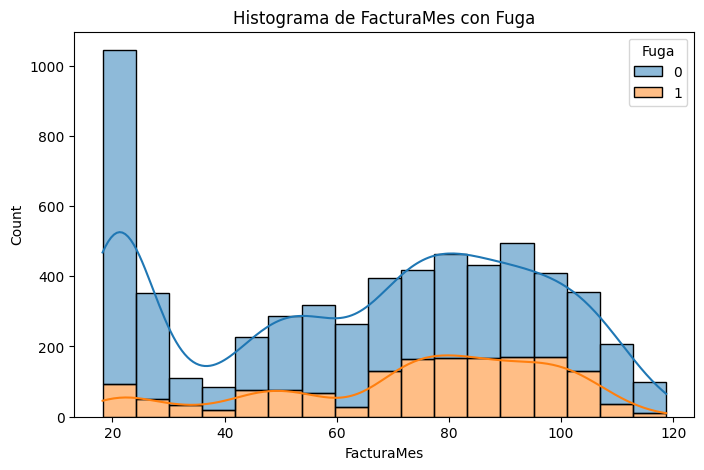

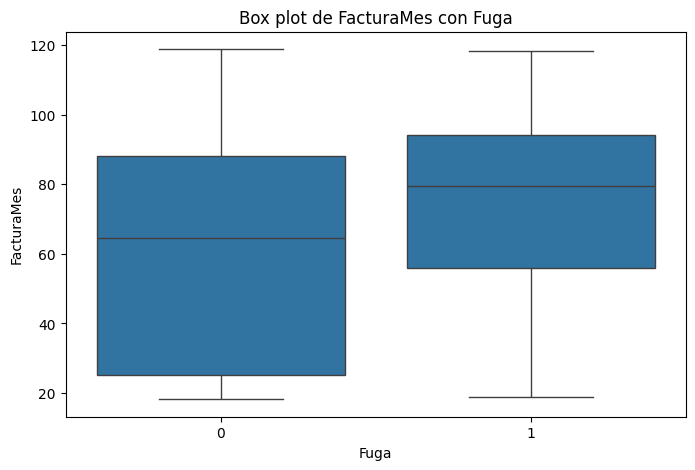

C:\Users\sixto\AppData\Local\Temp\ipykernel_128476\444022137.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proportion_df = cleaned_df.groupby(bins)[target].mean().reset_index()


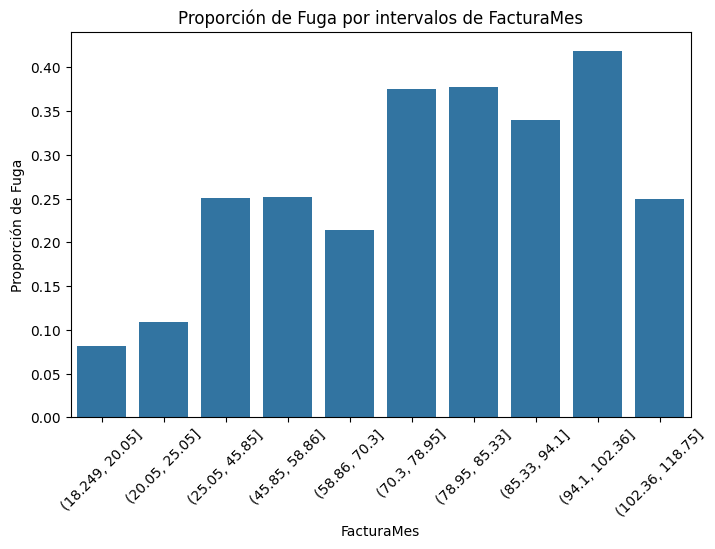

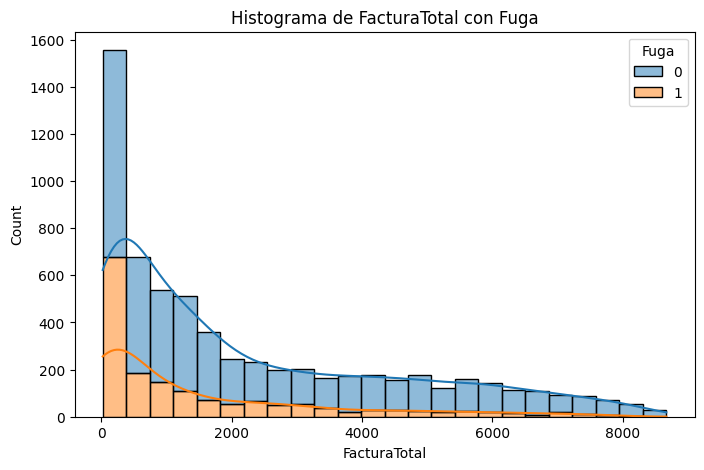

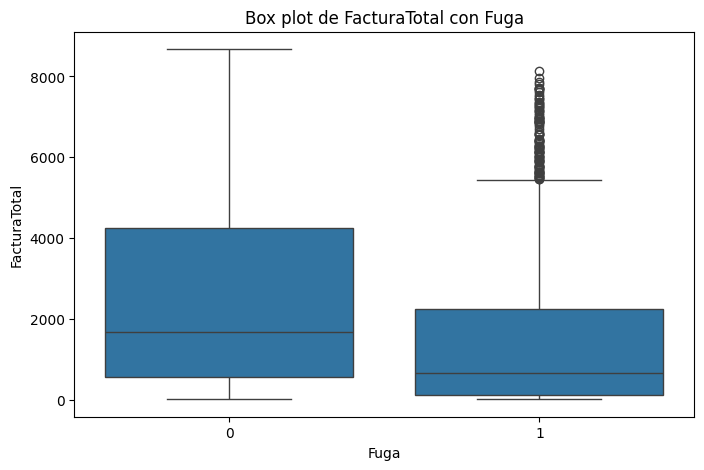

C:\Users\sixto\AppData\Local\Temp\ipykernel_128476\444022137.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proportion_df = cleaned_df.groupby(bins)[target].mean().reset_index()


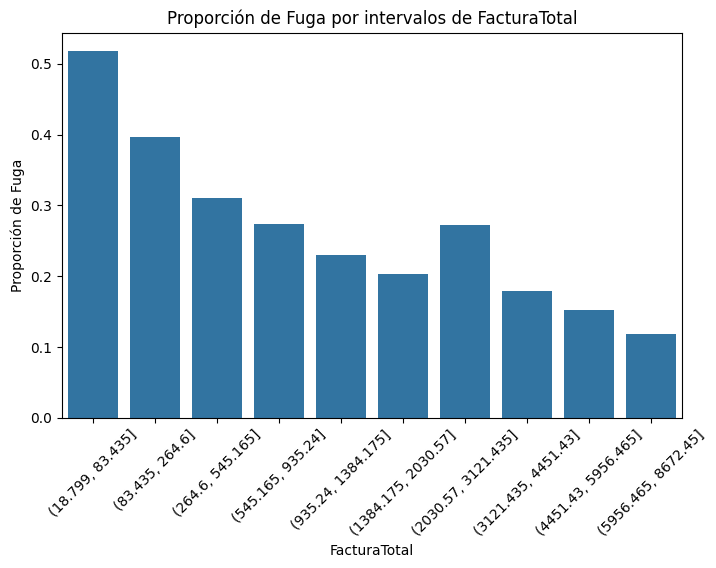

Coeficiente de correlación entre Antiguedad y Fuga: -0.3612420920844082
Coeficiente de correlación entre FacturaMes y Fuga: 0.19106597615048962
Coeficiente de correlación entre FacturaTotal y Fuga: -0.20586319671496872
R^2 de la regresión entre Antiguedad y Fuga: 0.13049584909351997
R^2 de la regresión entre FacturaMes y Fuga: 0.03650620724233977
R^2 de la regresión entre FacturaTotal y Fuga: 0.04237965576170499


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import pandas as pd
import statsmodels.api as sm

# Variables a analizar
variables_numericas = ['Antiguedad', 'FacturaMes', 'FacturaTotal']

# Crear una lista para almacenar los resultados
correlation_results = []
regression_results = []

# Función para calcular el coeficiente de correlación de Pearson, generar histogramas, box plots y calcular R^2
def analyze_correlation_and_regression(df, var, target):
    # Eliminar filas con valores NaN en las columnas relevantes
    cleaned_df = df[[var, target]].dropna()
    correlation, p_value = pearsonr(cleaned_df[var], cleaned_df[target])
    
    # Graficar histograma
    plt.figure(figsize=(8, 5))
    sns.histplot(data=cleaned_df, x=var, hue=target, multiple='stack', kde=True)
    plt.title(f'Histograma de {var} con {target}')
    plt.show()
    
    # Graficar box plot
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=cleaned_df, x=target, y=var)
    plt.title(f'Box plot de {var} con {target}')
    plt.show()

    # Calcular y graficar proporciones
    bins = pd.qcut(cleaned_df[var], q=10)  # Usar qcut para crear intervalos con la misma cantidad de datos
    cleaned_df[target] = cleaned_df[target].astype(float)  # Asegurarse de que la columna target sea numérica
    proportion_df = cleaned_df.groupby(bins)[target].mean().reset_index()

    plt.figure(figsize=(8, 5))
    sns.barplot(x=proportion_df[var].astype(str), y=proportion_df[target])
    plt.xticks(rotation=45)
    plt.title(f'Proporción de {target} por intervalos de {var}')
    plt.ylabel(f'Proporción de {target}')
    plt.xlabel(var)
    plt.show()
    
    # Calcular la regresión lineal y el R^2
    X = sm.add_constant(cleaned_df[var])  # Agregar constante para el intercepto
    model = sm.OLS(cleaned_df[target], X).fit()
    r_squared = model.rsquared
    
    return correlation, p_value, r_squared

# Calcular la correlación y mostrar los gráficos para cada variable con 'Fuga'
for variable in variables_numericas:
    correlation, p_value, r_squared = analyze_correlation_and_regression(clientes, variable, 'Fuga')
    correlation_results.append((variable, correlation, p_value))
    regression_results.append((variable, r_squared))

# Mostrar los resultados de correlación
for variable, correlation, p_value in correlation_results:
    print(f"Coeficiente de correlación entre {variable} y Fuga: {correlation}")

# Mostrar los resultados de R^2
for variable, r_squared in regression_results:
    print(f"R^2 de la regresión entre {variable} y Fuga: {r_squared}")



**Antiguedad Edad**: genial, muy importante y relación lineal.  

**Factura Mes**: relación no lineal, tramificar. 

**Factura total**: primeros tramos peligro de fuga, luego es muy dificil irse. Relación lineal.

### 2) Depuración 

#### **Valores Atípicos**

In [18]:
clientes.select_dtypes(include=np.number).apply(lambda x: x.skew())

Antiguedad      0.240505
FacturaMes     -0.219667
FacturaTotal    0.967912
dtype: float64

In [19]:
## Función manual de winsor con clip+quantile 
def winsorize_with_pandas(s, limits):
    """
    s : pd.Series
        Series to winsorize
    limits : tuple of float
        Tuple of the percentages to cut on each side of the array, 
        with respect to the number of unmasked data, as floats between 0. and 1
    """
    return s.clip(lower=s.quantile(limits[0], interpolation='lower'), 
                  upper=s.quantile(1-limits[1], interpolation='higher'))

In [20]:
from scipy import stats # Añadimos en este punto para cargar la librería que ahora hace falta

## Función para gestionar outliers
def gestiona_outliers(col,clas = 'check'):
     print(col.name)
     # Condición de asimetría y aplicación de criterio 1 según el caso
     if abs(col.skew()) < 1:
        criterio1 = abs((col-col.mean())/col.std())>3
     else:
        criterio1 = abs((col-col.median())/stats.median_abs_deviation(col))>6 ## Cambio mad por median_abs_deviation!! 
     
     # Calcular primer cuartil     
     q1 = col.quantile(0.25)  
     # Calcular tercer cuartil  
     q3 = col.quantile(0.75)
     # Calculo de IQR
     IQR=q3-q1
     # Calcular criterio 2 (general para cualquier asimetría)
     criterio2 = (col<(q1 - 3*IQR))|(col>(q3 + 3*IQR))
     lower = col[criterio1&criterio2&(col<q1)].count()/col.dropna().count()
     upper = col[criterio1&criterio2&(col>q3)].count()/col.dropna().count()
     # Salida según el tipo deseado
     if clas == 'check':
            return(lower*100,upper*100,(lower+upper)*100)
     elif clas == 'winsor':
            return(winsorize_with_pandas(col,(lower,upper)))
     elif clas == 'miss':
            print('\n MissingAntes: ' + str(col.isna().sum()))
            col.loc[criterio1&criterio2] = np.nan
            print('MissingDespues: ' + str(col.isna().sum()) +'\n')
            return(col)

          
# Llamada en modo check
imput.select_dtypes(include=np.number).copy().apply(lambda x: gestiona_outliers(x))#.set_index(['Low','up','Tot'])

Antiguedad
FacturaMes
FacturaTotal


,Antiguedad,FacturaMes,FacturaTotal
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0


No hay atípicos por ningún lado

#### **Valores perdidos**

Hacemos una primera comparativa entre el trainning y test, puesto que el test no tiene perdidos

In [21]:
clientes.describe()

,Antiguedad,FacturaMes,FacturaTotal
count,5959.000000,5959.000000,6342.000000
mean,32.380769,64.678369,2268.727152
std,24.540411,30.013422,2258.843022
min,0.000000,18.250000,18.800000
25%,9.000000,35.550000,394.475000
50%,29.000000,70.300000,1384.175000
75%,55.000000,89.800000,3781.512500
max,72.000000,118.750000,8672.450000


In [22]:
test.describe()

,Antiguedad,FacturaMes,FacturaTotal
count,690.000000,690.000000,690.000000
mean,34.053623,65.659348,2417.247971
std,24.695387,30.341129,2335.808905
min,1.000000,18.850000,19.150000
25%,10.000000,39.425000,450.037500
50%,32.000000,70.775000,1542.600000
75%,58.000000,90.700000,3893.325000
max,72.000000,118.600000,8684.800000


#### Tratamiento Antiguedad = 0 

Distribuciones muy parecidas como era lógico si la división se hizo bien en su día. Si que en el test, el **mínimo de Antiguedad es 1**, y en el tranning es 0. Sospechamos que el trainning debe estar mal porque no tener ningún mes de servicio no sería un clientes de la compañía.

Creo que puedo imputar este valor por Antiguedad = 1 ya que es lo más próximo y lógico. Para ello necesito comprobar varias cosas: 

1) Ver como se comporta el trainning en Antiguedad = 0
2) Ver como se comporta el training en Antiguedad = 1
3) Ver como se comporta el test en Antiguedad = 1

In [23]:
clientes[clientes['Antiguedad'] == 0]

,ID,Genero,Mayor65,Conyuge,PersCargo,Antiguedad,Telf_serv,VariasLineas,Int_serv,Seguridad,...,Antivirus_disp,Soporte_tecnico,TV_streaming,Peliculas,Contrato,Fact_sinPapel,MetodoPago,FacturaMes,FacturaTotal,Fuga
440,4472-LVYGI,Female,0.0,Yes,Yes,0.0,No,No,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,0
682,3115-CZMZD,Male,0.0,No,Yes,0.0,Yes,No,No,No,...,No,No,No,No,Two year,No,Mailed check,20.25,NaN,0
852,5709-LVOEQ,Female,0.0,Yes,Yes,0.0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,0
982,4367-NUYAO,Male,0.0,Yes,Yes,0.0,Yes,Yes,No,No,...,No,No,No,No,Two year,No,Mailed check,25.75,NaN,0
1211,1371-DWPAZ,Female,0.0,Yes,Yes,0.0,No,No,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,0
3004,7644-OMVMY,Male,NaN,Yes,Yes,0.0,Yes,No,No,No,...,No,No,No,No,Two year,No,Mailed check,19.85,NaN,0
3954,2520-SGTTA,Female,0.0,Yes,Yes,0.0,Yes,No,No,No,...,No,No,No,No,Two year,No,Mailed check,20.00,NaN,0
4712,2923-ARZLG,Male,0.0,Yes,Yes,0.0,Yes,No,No,No,...,No,No,No,No,NaN,Yes,Mailed check,19.70,NaN,0
6022,4075-WKNIU,Female,0.0,Yes,Yes,0.0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,0
6094,2775-SEFEE,Male,0.0,No,Yes,0.0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,0


Vemos que la mayoría tienen contrato de dos años y no disponen de Factural Total. Me planteo **imputarlas con Antiguead = 1** y Factura Total ponerle la misma cantidad que Factura Mes, puesto que llevarian solo un mes.

In [24]:
clientes[clientes['Antiguedad'] == 1].head(5)

,ID,Genero,Mayor65,Conyuge,PersCargo,Antiguedad,Telf_serv,VariasLineas,Int_serv,Seguridad,...,Antivirus_disp,Soporte_tecnico,TV_streaming,Peliculas,Contrato,Fact_sinPapel,MetodoPago,FacturaMes,FacturaTotal,Fuga
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,NaN,NaN,29.85,0
19,1066-JKSGK,Male,0.0,No,No,1.0,Yes,No,No,No,...,No,No,No,No,Month-to-month,No,Mailed check,20.15,20.15,1
24,8665-UTDHZ,Male,0.0,Yes,Yes,1.0,No,No,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.20,1
30,7310-EGVHZ,Male,0.0,No,No,1.0,Yes,No,No,No,...,No,No,No,No,NaN,No,Bank transfer (automatic),NaN,20.20,0
31,3413-BMNZE,NaN,1.0,No,No,1.0,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),45.25,45.25,0


In [25]:
test[test['Antiguedad'] == 1].head(5)

,ID,Genero,Mayor65,Conyuge,PersCargo,Antiguedad,Telf_serv,VariasLineas,Int_serv,Seguridad,CopiaSeguridad,Antivirus_disp,Soporte_tecnico,TV_streaming,Peliculas,Contrato,Fact_sinPapel,MetodoPago,FacturaMes,FacturaTotal
1,8779-QRDMV,Male,1,No,No,1,No,No,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65
11,3930-ZGWVE,Male,0,No,No,1,Yes,No,No,No,No,No,No,No,No,Month-to-month,No,Mailed check,19.75,19.75
25,5940-AHUHD,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Mailed check,70.60,70.60
27,2080-SRCDE,Female,0,No,Yes,1,Yes,Yes,No,No,No,No,No,No,No,Month-to-month,No,Mailed check,25.40,25.40
28,8203-XJZRC,Male,0,No,No,1,Yes,No,No,No,No,No,No,No,No,Month-to-month,No,Mailed check,20.25,20.25


In [26]:
# Filtrar el DataFrame para obtener las filas donde 'Antiguedad' es igual a 1
clientes_antiguedad_1 = clientes[clientes['Antiguedad'] == 1]
test_antiguedad_1 = test[test['Antiguedad'] == 1]

# Calcular la media de la columna 'FacturaMes' para el subconjunto filtrado
media_factura_mes_trainning = clientes_antiguedad_1['FacturaMes'].mean()
media_factura_mes_test = test_antiguedad_1['FacturaMes'].mean()

print(media_factura_mes_trainning)
print(media_factura_mes_test)

51.34904255319149
53.05948275862069


In [27]:
clientes_antiguedad_0 = clientes[clientes['Antiguedad'] == 0]

media_factura_mes_trainning0 = clientes_antiguedad_0['FacturaMes'].mean()

print(media_factura_mes_trainning0)



43.025


Un pelín por debajo la facturaMes de lo común, aunque es normal con tan pocas observaciones. Si que me preocupa la variable Contrato porque la mayoría en Antiguedad = 0 eran Two year y no he visto eso en training y test con Antiguedad = 1

In [28]:
# Filtrar el DataFrame para obtener las filas donde 'Antiguedad' es igual a 1
clientes_antiguedad_0 = clientes[clientes['Antiguedad'] == 0]
clientes_antiguedad_1 = clientes[clientes['Antiguedad'] == 1]
test_antiguedad_1 = test[test['Antiguedad'] == 1]

# Contar la cantidad de valores para la variable 'Contrato' en el subconjunto filtrado
valores_contrato_trainning_0 = clientes_antiguedad_0['Contrato'].value_counts()
valores_contrato_trainning_1 = clientes_antiguedad_1['Contrato'].value_counts()
valores_contrato_test = test_antiguedad_1['Contrato'].value_counts()

print("Cantidad de valores para la variable 'Contrato'  en el conjunto de entrenamiento Antiguedad 0:")
print(valores_contrato_trainning_0)

print("\nCantidad de valores para la variable 'Contrato' en el conjunto de entrenamiento Antiguedad 1:")
print(valores_contrato_trainning_1)

print("\nCantidad de valores para la variable 'Contrato' en el conjunto de prueba:")
print(valores_contrato_test)


Cantidad de valores para la variable 'Contrato'  en el conjunto de entrenamiento Antiguedad 0:
Contrato
Two year          9
Month-to-month    0
One year          0
Name: count, dtype: int64

Cantidad de valores para la variable 'Contrato' en el conjunto de entrenamiento Antiguedad 1:
Contrato
Month-to-month    476
One year            4
Two year            2
Name: count, dtype: int64

Cantidad de valores para la variable 'Contrato' en el conjunto de prueba:
Contrato
Month-to-month    56
One year           2
Two year           0
Name: count, dtype: int64


Conociendo la importancia de la variable Contrato, estos valores ya me dan miedo. Procedo a **eliminación**, son solo 10 y no queremos complicaciones

In [29]:
# Mostrar registros que tienen FacturaTotal igual a 0 (para confirmar)
print("\nComprobamos los registros de nuevo con Antiguedad igual a 0:")
len(clientes[clientes['Antiguedad'] == 0])


Comprobamos los registros de nuevo con Antiguedad igual a 0:


10

In [30]:
# Eliminar los registros donde 'FacturaTotal' es igual a 0
clientes = clientes[clientes['Antiguedad'] != 0]

# Verificar la cantidad de registros después de la eliminación
print("\nCantidad de registros después de la eliminación:", len(clientes))

# Mostrar la información del DataFrame después de la eliminación
print("\nVemos si se han eliminado correctamente:")
len(clientes[clientes['Antiguedad'] == 0])



Cantidad de registros después de la eliminación: 6343

Vemos si se han eliminado correctamente:


0

In [31]:
#Proporción de missings por variable 
clientes.apply(lambda x: x.isna().sum()/clientes.shape[0]*100)

ID                 0.000000
Genero             5.549425
Mayor65            5.533659
Conyuge            0.000000
PersCargo          0.000000
Antiguedad         6.211572
Telf_serv          1.450418
VariasLineas       0.000000
Int_serv           2.995428
Seguridad          0.000000
CopiaSeguridad     0.000000
Antivirus_disp     0.000000
Soporte_tecnico    0.000000
TV_streaming       0.000000
Peliculas          0.000000
Contrato           6.195806
Fact_sinPapel      4.114772
MetodoPago         7.441274
FacturaMes         6.211572
FacturaTotal       0.015765
Fuga               0.000000
dtype: float64

Variables peligrosas: **Método de Pago**, **Antiguedad** y **FacturaMes**

In [32]:
#Proporción de missings por observación (como una nueva columna del dataset)
clientes['prop_missings'] = clientes.apply(lambda x: x.isna().sum(),axis=1)

# Valoramos distribución
clientes.prop_missings.describe()

count    6343.000000
mean        0.457197
std         0.645208
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: prop_missings, dtype: float64

In [33]:
clientes.sort_values(by='prop_missings', ascending=False).head()


,ID,Genero,Mayor65,Conyuge,PersCargo,Antiguedad,Telf_serv,VariasLineas,Int_serv,Seguridad,...,Soporte_tecnico,TV_streaming,Peliculas,Contrato,Fact_sinPapel,MetodoPago,FacturaMes,FacturaTotal,Fuga,prop_missings
1577,8540-ZQGEA,Female,0.0,Yes,No,NaN,Yes,No,No,No,...,No,No,No,Two year,No,NaN,NaN,1102.40,0,3
3447,3213-VVOLG,Male,NaN,Yes,Yes,NaN,Yes,Yes,No,No,...,No,No,No,Two year,No,Mailed check,25.35,NaN,0,3
4681,8988-ECPJR,Female,NaN,Yes,Yes,34.0,Yes,Yes,Fiber optic,No,...,No,No,No,NaN,Yes,Mailed check,NaN,2718.30,1,3
1316,6362-QHAFM,Male,0.0,Yes,No,NaN,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,One year,Yes,NaN,NaN,4586.15,0,3
4927,1221-GHZEP,Female,NaN,No,No,NaN,Yes,No,DSL,Yes,...,Yes,No,Yes,Two year,Yes,NaN,65.10,3846.75,0,3


Probemos una ley lógica, y es que FacturaTotal tiene una relación con FacturaMes y Antiguedad. En teoría debería ser la multiplicación de ambas. 

In [34]:
# Seleccionar las columnas de interés
columnas_interes = ['Antiguedad', 'FacturaMes', 'FacturaTotal', 'Contrato', 'prop_missings']

# Filtrar el DataFrame para incluir solo las columnas seleccionadas
clientes_interes = clientes[columnas_interes]

# Ordenar por 'prop_missings' en orden descendente y mostrar las primeras filas
clientes_interes_sorted = clientes_interes.sort_values(by='prop_missings', ascending=True)
print(clientes_interes_sorted.head(20))


      Antiguedad  FacturaMes  FacturaTotal        Contrato  prop_missings
3177        16.0       19.35        295.55        One year              0
5155        20.0       90.80       1951.00  Month-to-month              0
5154        70.0      110.50       7752.05        Two year              0
5153        12.0       19.30        228.75        One year              0
2903         3.0       29.75         96.85  Month-to-month              0
2904         2.0       44.90        111.05  Month-to-month              0
2905         3.0       29.80         94.40  Month-to-month              0
2906         7.0       74.65        521.10  Month-to-month              0
2907        13.0       71.95        923.85  Month-to-month              0
2908         7.0       20.75        141.10  Month-to-month              0
2910        53.0      105.25       5576.30        One year              0
2911        12.0       94.20       1046.10  Month-to-month              0
2912        63.0       19.55       124

A priori parece que la relación podría darse la relación descrita: 

$$ \text{FacturaTotal} = \text{FacturaMes} \times \text{Antig.fc.edad} $$

Probaremos un **test estadístico** para comprobar de una forma más "científica" si lo que pensamos es cierto

In [35]:
from scipy.stats import ttest_rel

# Filtrar registros que no tienen valores nulos en las variables de interés
filtered_clientes = clientes.dropna(subset=['Antiguedad', 'FacturaMes', 'FacturaTotal']).copy()

# Calcular el valor esperado de FacturaTotal
filtered_clientes.loc[:, 'FacturaTotal_expected'] = filtered_clientes['FacturaMes'] * filtered_clientes['Antiguedad']

# Comparar el valor esperado con el valor real
filtered_clientes.loc[:, 'comparison'] = filtered_clientes['FacturaTotal'] == filtered_clientes['FacturaTotal_expected']

# Calcular el porcentaje de coincidencias exactas
exact_matches = filtered_clientes['comparison'].mean() * 100

# Calcular el error absoluto medio (MAE)
mae = (filtered_clientes['FacturaTotal'] - filtered_clientes['FacturaTotal_expected']).abs().mean()

# Mostrar los resultados
print(f"Porcentaje de coincidencias exactas: {exact_matches:.2f}%")
print(f"Error absoluto medio (MAE): {mae:.2f}")

# Realizar el test t para muestras emparejadas
t_stat, p_value = ttest_rel(filtered_clientes['FacturaTotal'], filtered_clientes['FacturaTotal_expected'])

# Mostrar los resultados del test t
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.5f}\n")

# Contar valores de FacturaTotal mayores, iguales y menores que FacturaTotal_expected
mayores = (filtered_clientes['FacturaTotal'] > filtered_clientes['FacturaTotal_expected']).sum()
iguales = (filtered_clientes['FacturaTotal'] == filtered_clientes['FacturaTotal_expected']).sum()
menores = (filtered_clientes['FacturaTotal'] < filtered_clientes['FacturaTotal_expected']).sum()

print(f"Valores de FacturaTotal mayores que FacturaTotal_expected: {mayores}")
print(f"Valores de FacturaTotal iguales a FacturaTotal_expected: {iguales}")
print(f"Valores de FacturaTotal menores que FacturaTotal_expected: {menores}\n")

# Calcular el valor medio de FacturaTotal dividido por FacturaTotal_expected
mean_ratio = (filtered_clientes['FacturaTotal'] / filtered_clientes['FacturaTotal_expected']).mean()
print(f"Valor medio de FacturaTotal dividido por FacturaTotal_expected: {mean_ratio:.2f}\n")

# Opcional: Mostrar algunas filas donde no coinciden para revisión
mismatches = filtered_clientes[filtered_clientes['comparison'] == False]
print(mismatches[['FacturaMes', 'Antiguedad', 'FacturaTotal', 'FacturaTotal_expected']].head())


Porcentaje de coincidencias exactas: 8.44%
Error absoluto medio (MAE): 45.32
T-statistic: 0.41
P-value: 0.68521

Valores de FacturaTotal mayores que FacturaTotal_expected: 2553
Valores de FacturaTotal iguales a FacturaTotal_expected: 471
Valores de FacturaTotal menores que FacturaTotal_expected: 2557

Valor medio de FacturaTotal dividido por FacturaTotal_expected: 1.00

   FacturaMes  Antiguedad  FacturaTotal  FacturaTotal_expected
2       53.85         2.0        108.15                  107.7
3       42.30        45.0       1840.75                 1903.5
5       99.65         8.0        820.50                  797.2
7       29.75        10.0        301.90                  297.5
8      104.80        28.0       3046.05                 2934.4


La relación es casi perfecta por lo que procederé a imputar seguiendo la fórmula. 

El test nos dice que no hay razón alguna para rechazar la hipotesis nula, además, la similitud es perfecta si vemos el valor medio. Por lo que **imputaremos usando la fórmula** siempre que sea posible.

In [36]:
def imputar_valores_continuas(df):
    # Número inicial de valores faltantes
    missing_initial = df[['FacturaMes', 'Antiguedad', 'FacturaTotal']].isnull().sum().sum()
    missing_current = missing_initial
    
    while True:
        for index, row in df.iterrows():
            if pd.isnull(row['FacturaTotal']) and not pd.isnull(row['FacturaMes']) and not pd.isnull(row['Antiguedad']):
                df.at[index, 'FacturaTotal'] = row['FacturaMes'] * row['Antiguedad']
            elif pd.isnull(row['FacturaMes']) and not pd.isnull(row['FacturaTotal']) and not pd.isnull(row['Antiguedad']):
                df.at[index, 'FacturaMes'] = row['FacturaTotal'] / row['Antiguedad']
            elif pd.isnull(row['Antiguedad']) and not pd.isnull(row['FacturaTotal']) and not pd.isnull(row['FacturaMes']):
                df.at[index, 'Antiguedad'] = row['FacturaTotal'] / row['FacturaMes']
        
        # Recalcular el número de valores faltantes
        missing_new = df[['FacturaMes', 'Antiguedad', 'FacturaTotal']].isnull().sum().sum()
        
        # Si no hay cambios, salir del bucle
        if missing_new == missing_current:
            break
        else:
            missing_current = missing_new
    
    return df

clientes = imputar_valores_continuas(clientes)

# Verificar la imputación
print(clientes[['FacturaMes', 'Antiguedad', 'FacturaTotal']].isnull().sum())

FacturaMes      26
Antiguedad      27
FacturaTotal     1
dtype: int64


In [37]:
#Proporción de missings por variable 
clientes.apply(lambda x: x.isna().sum()/clientes.shape[0]*100)

ID                 0.000000
Genero             5.549425
Mayor65            5.533659
Conyuge            0.000000
PersCargo          0.000000
Antiguedad         0.425666
Telf_serv          1.450418
VariasLineas       0.000000
Int_serv           2.995428
Seguridad          0.000000
CopiaSeguridad     0.000000
Antivirus_disp     0.000000
Soporte_tecnico    0.000000
TV_streaming       0.000000
Peliculas          0.000000
Contrato           6.195806
Fact_sinPapel      4.114772
MetodoPago         7.441274
FacturaMes         0.409901
FacturaTotal       0.015765
Fuga               0.000000
prop_missings      0.000000
dtype: float64

Vemos que hemos arreglado practicamente todo de FacturaMes y Antiguedad. 

Ahora imputemos con **knn** el resto de varialbes, esto lleva necesariamente hacer un **one-hot encoding** por lo que debemos aplicar lo mismo en el test. 

#### Knn y one-hot encoding Trainning

In [38]:
import pandas as pd
from sklearn.impute import KNNImputer

# Supongamos que 'clientes' ya está cargado como un DataFrame

# Separar la variable objetivo y eliminar 'ID'
varObj = clientes['Fuga']
imput_clientes = clientes.drop(columns=['Fuga', 'ID'])

# Guardar el conteo de valores nulos antes de la imputación
missing_before_clientes = imput_clientes.isnull().sum()

# Convertir las variables categóricas a numéricas mediante one-hot encoding
imput_clientes_encoded = pd.get_dummies(imput_clientes, drop_first=True)

# Inicializar el imputador KNN
imputer = KNNImputer(n_neighbors=15)

# Aplicar el imputador a los datos
imput_clientes_imputed = imputer.fit_transform(imput_clientes_encoded)

# Convertir el resultado a un DataFrame
imput_clientes_imputed_df = pd.DataFrame(imput_clientes_imputed, columns=imput_clientes_encoded.columns, index=clientes.index)

# Guardar el conteo de valores nulos después de la imputación
missing_after_clientes = imput_clientes_imputed_df.isnull().sum()

# Eliminar las columnas originales del DataFrame 'clientes' que están en 'imput_clientes'
clientes.drop(columns=imput_clientes.columns, inplace=True)

# Concatenar las columnas imputadas con el DataFrame original 'clientes'
clientes = pd.concat([clientes, imput_clientes_imputed_df], axis=1)

# Calcular la diferencia para obtener el número de valores imputados
imputed_counts_clientes = missing_before_clientes - missing_after_clientes

# Mostrar la información del DataFrame
clientes.info()

# Mostrar el número de valores imputados por variable
print("\nValores imputados por variable en clientes:")
print(imputed_counts_clientes)

# Verificar los primeros registros
print(clientes.head())


<class 'pandas.core.frame.DataFrame'>
Index: 6343 entries, 0 to 6352
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   ID                                  6343 non-null   object  
 1   Fuga                                6343 non-null   category
 2   Antiguedad                          6343 non-null   float64 
 3   FacturaMes                          6343 non-null   float64 
 4   FacturaTotal                        6343 non-null   float64 
 5   prop_missings                       6343 non-null   float64 
 6   Genero_Male                         6343 non-null   float64 
 7   Mayor65_1.0                         6343 non-null   float64 
 8   Conyuge_Yes                         6343 non-null   float64 
 9   PersCargo_Yes                       6343 non-null   float64 
 10  Telf_serv_Yes                       6343 non-null   float64 
 11  VariasLineas_Yes                   

#### One-hot encoding Test

In [39]:
# Eliminar la columna 'ID' (asumiendo que 'Fuga' no está en 'test')
imput_test = test.drop(columns=['ID'])

# Convertir las variables categóricas a numéricas mediante one-hot encoding
imput_test_encoded = pd.get_dummies(imput_test, drop_first=True)

# Alinear las columnas de 'test' con las de 'clientes'
imput_test_encoded = imput_test_encoded.reindex(columns=imput_clientes_encoded.columns, fill_value=0)

# Aplicar el imputador KNN a 'test'
imput_test_imputed = imputer.transform(imput_test_encoded)

# Convertir el resultado a un DataFrame
imput_test_imputed_df = pd.DataFrame(imput_test_imputed, columns=imput_clientes_encoded.columns, index=test.index)

# Eliminar las columnas originales del DataFrame 'test' que están en 'imput_test'
test.drop(columns=imput_test.columns, inplace=True)

# Concatenar las columnas imputadas con el DataFrame original 'test'
test = pd.concat([test, imput_test_imputed_df], axis=1)

# Mostrar la información del DataFrame
test.info()

# Verificar los primeros registros
print(test.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  690 non-null    object 
 1   Antiguedad                          690 non-null    float64
 2   FacturaMes                          690 non-null    float64
 3   FacturaTotal                        690 non-null    float64
 4   prop_missings                       690 non-null    float64
 5   Genero_Male                         690 non-null    float64
 6   Mayor65_1.0                         690 non-null    float64
 7   Conyuge_Yes                         690 non-null    float64
 8   PersCargo_Yes                       690 non-null    float64
 9   Telf_serv_Yes                       690 non-null    float64
 10  VariasLineas_Yes                    690 non-null    float64
 11  Int_serv_Fiber optic                690 non-n

Comprobamos de que todas las variables son iguales en ambos datasets, excepto 'Fuga'

In [40]:
# Obtener las columnas de ambos DataFrames
columns_clientes = set(clientes.columns) - {'Fuga'}
columns_test = set(test.columns)

# Comprobar si las columnas (excepto 'Fuga') son iguales en ambos datasets
if columns_clientes == columns_test:
    print("Las columnas de 'clientes' y 'test' coinciden (excepto 'Fuga').")
else:
    print("Las columnas de 'clientes' y 'test' no coinciden.")
    # Mostrar las diferencias
    diferencias_clientes = columns_clientes - columns_test
    diferencias_test = columns_test - columns_clientes
    print(f"Columnas en 'clientes' pero no en 'test': {diferencias_clientes}")
    print(f"Columnas en 'test' pero no en 'clientes': {diferencias_test}")


Las columnas de 'clientes' y 'test' coinciden (excepto 'Fuga').


In [41]:
# Compruebo que se ha mantenido mi imputacion con la formula despues de hacer knn, se que el registo 6993-YGFJV se le imputó FacturaMes

# Filtrar el registro específico usando el valor del 'ID'
registro_6993_YGFJV_df = clientes[clientes['ID'] == '6993-YGFJV']

# Mostrar el DataFrame del registro específico
print(registro_6993_YGFJV_df)


              ID Fuga  Antiguedad  FacturaMes  FacturaTotal  prop_missings  \
2136  6993-YGFJV    0        69.0  113.137681        7806.5            3.0   

      Genero_Male  Mayor65_1.0  Conyuge_Yes  PersCargo_Yes  ...  \
2136          1.0          0.0          1.0            0.0  ...   

      Antivirus_disp_Yes  Soporte_tecnico_Yes  TV_streaming_Yes  \
2136                 1.0                  1.0               1.0   

      Peliculas_Yes  Contrato_One year  Contrato_Two year  Fact_sinPapel_Yes  \
2136            1.0                0.0                1.0                0.0   

      MetodoPago_Credit card (automatic)  MetodoPago_Electronic check  \
2136                                 0.0                          0.0   

      MetodoPago_Mailed check  
2136                      0.0  

[1 rows x 26 columns]


Me cuadra ese 113, me quedo tranquilo

In [42]:
### Comprobacion de null_values 
null_values = clientes.isnull().sum()
null_columns = null_values[null_values > 0]

print(null_columns)

Series([], dtype: int64)


Termino ya la imputación estableciendo bien mis variables. Elimino **ID** y **Fuga** la paso a float64

### **Nuevas Variables**


#### **Manual**

Creo una nueva variable llamada **year** y le cambio el nombre a Antiguedad por **month**, que es lo que en realidad representa. 

In [43]:
# Crear la nueva columna 'year' a partir de 'Antiguedad'
clientes['year'] = np.ceil(clientes['Antiguedad'] / 12).astype(float)
test['year'] = np.ceil(test['Antiguedad'] / 12).astype(float)

# Renombrar 'Antiguedad' a 'month'
clientes.rename(columns={'Antiguedad': 'month'}, inplace=True)
test.rename(columns={'Antiguedad': 'month'}, inplace=True)


In [44]:
print(clientes[['month', 'year']].head())

       month  year
0   1.000000   1.0
1  34.000000   3.0
2   2.000000   1.0
3  45.000000   4.0
4   2.144979   1.0


In [45]:
print(test[['month', 'year']].head())

   month  year
0   21.0   2.0
1    1.0   1.0
2   12.0   1.0
3   72.0   6.0
4   17.0   2.0


In [46]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6343 entries, 0 to 6352
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   ID                                  6343 non-null   object  
 1   Fuga                                6343 non-null   category
 2   month                               6343 non-null   float64 
 3   FacturaMes                          6343 non-null   float64 
 4   FacturaTotal                        6343 non-null   float64 
 5   prop_missings                       6343 non-null   float64 
 6   Genero_Male                         6343 non-null   float64 
 7   Mayor65_1.0                         6343 non-null   float64 
 8   Conyuge_Yes                         6343 non-null   float64 
 9   PersCargo_Yes                       6343 non-null   float64 
 10  Telf_serv_Yes                       6343 non-null   float64 
 11  VariasLineas_Yes                   

Cambiamos tipo de variables para el binning

In [47]:
# Lista de columnas con menos de 10 valores distintos. Potenciales factores!
to_factor_clientes = list(clientes.loc[:, clientes.nunique() <= 10])
to_factor_test = list(test.loc[:, test.nunique() <= 10])

# Podemos cambiar el tipo de todas ellas a factor de una vez
clientes[to_factor_clientes] = clientes[to_factor_clientes].astype('category')
test[to_factor_test] = test[to_factor_test].astype('category')
 

In [48]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6343 entries, 0 to 6352
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   ID                                  6343 non-null   object  
 1   Fuga                                6343 non-null   category
 2   month                               6343 non-null   float64 
 3   FacturaMes                          6343 non-null   float64 
 4   FacturaTotal                        6343 non-null   float64 
 5   prop_missings                       6343 non-null   category
 6   Genero_Male                         6343 non-null   category
 7   Mayor65_1.0                         6343 non-null   category
 8   Conyuge_Yes                         6343 non-null   category
 9   PersCargo_Yes                       6343 non-null   category
 10  Telf_serv_Yes                       6343 non-null   category
 11  VariasLineas_Yes                   

In [49]:
### Comprobacion de null_values 
null_values = clientes.isnull().sum()
null_columns = null_values[null_values > 0]

print(null_columns)

Series([], dtype: int64)


In [50]:
clientes['month'].min()

1.0

### **Binning**

Vamos a realizar varios tipos de binning para tener bastantes variables, de las cuales cuando vayamos a modelo elegiremos unas u otras. 

Primero debemos hablar antes de filosofía estadística. Tengo dos opciones:

1) Combinar temporalmente los conjuntos de datos para determinar los cortes de binning.
   
2) Aplicar el binning basado en estos cortes tanto al conjunto de entrenamiento como al de prueba.

Sabemos que el método 2 es más efectivo para predecir puesto que estaríamos aprendiendo también de nuestros datos de test.       



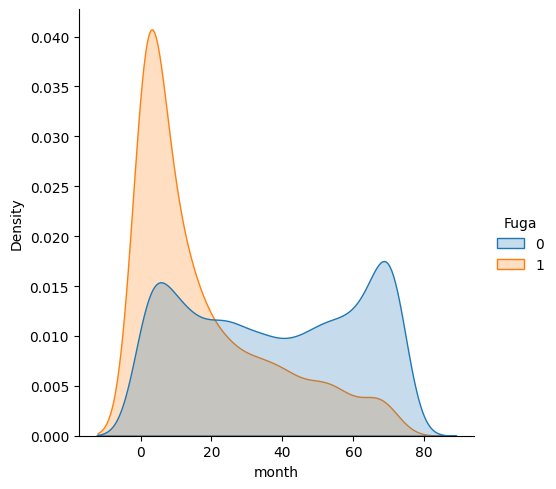

In [51]:
sns.displot(x=(clientes['month']), kind="kde", fill=True, hue=clientes.Fuga, common_norm=False)
plt.show()

Un corte razonable sería sobre 21-22, quizás luego en 60 y después en 80. En cualquier caso dejaremos que el algoritmo decida. 

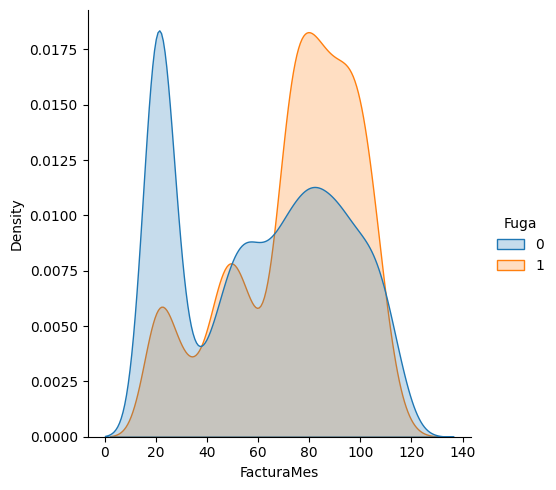

In [52]:
sns.displot(x=(clientes['FacturaMes']), kind="kde", fill=True, hue=clientes.Fuga, common_norm=False)
plt.show()

Bastantes cortes, pero con 3 igual iríamos bien. 

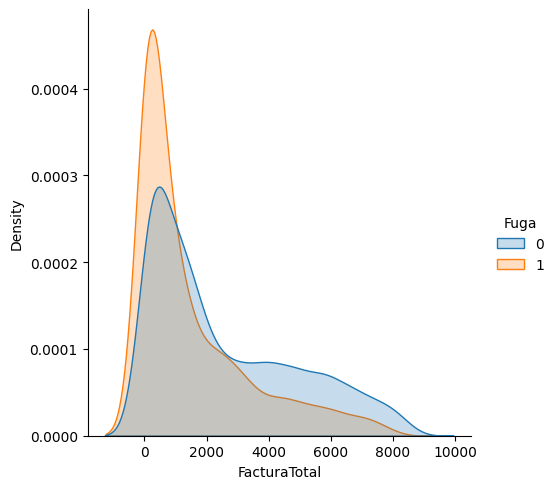

In [53]:
sns.displot(x=(clientes['FacturaTotal']), kind="kde", fill=True, hue=clientes.Fuga, common_norm=False)
plt.show()

Con un corte o dos podría valer

#### Binning usando WOE

In [54]:
# Librería para hacer la tramificación, agrupación y transformación WOE
from optbinning import Scorecard, BinningProcess, OptimalBinning
from optbinning.scorecard import plot_auc_roc, plot_cap, plot_ks

(CVXPY) Jul 10 07:12:34 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.10.4067). Expected < 9.10.0. Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Jul 10 07:12:34 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.10.4067). Expected < 9.10.0. Please open a feature request on cvxpy to enable support for this version.')


In [55]:
# 1) Definimos la lista de nombres señalando cualse de ellas son las categóricas
Y = clientes['Fuga'].values
X = clientes.drop(columns=['Fuga']) #todas menos la primera que es el ID y la variable y
list_variables = X.columns.values.tolist()
list_categorical = X.select_dtypes(include=['object', 'category']).columns.values.tolist()

In [56]:
# 2) Definimos el criterio de selección
selection_criteria = {
    "iv": {"min": 0.02}  # no imponemos "max": 1}
}

In [57]:
# 3) Definimos el proceso de Tramificación o BinningProcess
binning_process = BinningProcess(
    categorical_variables=list_categorical,
    variable_names=list_variables,
    selection_criteria=selection_criteria)

In [58]:
# 4) Obtenemos los tramos optimos de todas las Variables
clientes_binned_woe = binning_process.fit(X, Y)

In [59]:
clientes_binned_woe.summary().sort_values('iv')

,name,dtype,status,selected,n_bins,iv,js,gini,quality_score
0,ID,categorical,OPTIMAL,False,1,0.0,0.0,0,0.0
5,Genero_Male,categorical,OPTIMAL,False,2,0.000271,0.000034,0.008229,0.000329
9,Telf_serv_Yes,categorical,OPTIMAL,False,2,0.000405,0.000051,0.006248,0.000228
4,prop_missings,categorical,OPTIMAL,False,3,0.000744,0.000093,0.013141,0.000122
10,VariasLineas_Yes,categorical,OPTIMAL,False,2,0.008704,0.001088,0.046178,0.023524
18,Peliculas_Yes,categorical,OPTIMAL,False,2,0.015631,0.001952,0.061217,0.041135
17,TV_streaming_Yes,categorical,OPTIMAL,False,2,0.017767,0.002219,0.065123,0.046479
15,Antivirus_disp_Yes,categorical,OPTIMAL,True,2,0.02338,0.002918,0.07152,0.058346
24,MetodoPago_Mailed check,categorical,OPTIMAL,True,2,0.037832,0.004703,0.076144,0.069294
14,CopiaSeguridad_Yes,categorical,OPTIMAL,True,2,0.043147,0.005378,0.096563,0.107225


In [60]:
# Ahora podemos ir sacando las tablas para cada variable

clientes_binned_woe.get_binned_variable("month").binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 2.37)",776,0.122340,320,456,0.587629,-1.370184,2.764332e-01,3.208186e-02
1,"[2.37, 4.02)",337,0.053129,177,160,0.474777,-0.915037,5.205815e-02,6.289346e-03
2,"[4.02, 7.13)",337,0.053129,197,140,0.415430,-0.674451,2.747368e-02,3.370565e-03
3,"[7.13, 10.89)",339,0.053445,212,127,0.374631,-0.503613,1.500937e-02,1.856592e-03
4,"[10.89, 17.03)",590,0.093016,390,200,0.338983,-0.348183,1.214430e-02,1.510416e-03
5,"[17.03, 22.98)",362,0.057071,266,96,0.265193,0.003136,5.606759e-07,7.008446e-08
6,"[22.98, 43.01)",1322,0.208419,1037,285,0.215582,0.275585,1.478141e-02,1.841851e-03
7,"[43.01, 54.41)",656,0.103421,556,100,0.152439,0.699586,4.202983e-02,5.149147e-03
8,"[54.41, 60.13)",367,0.057859,325,42,0.114441,1.030143,4.622909e-02,5.535957e-03
9,"[60.13, 70.10)",786,0.123916,714,72,0.091603,1.278204,1.413860e-01,1.656056e-02


In [61]:
# Podemos transformar las variables WOE
dt_train_woe=clientes_binned_woe.transform(X, metric="woe")


In [62]:
dt_train_woe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6343 entries, 0 to 6352
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   month                               6343 non-null   float64
 1   FacturaMes                          6343 non-null   float64
 2   FacturaTotal                        6343 non-null   float64
 3   Mayor65_1.0                         6343 non-null   float64
 4   Conyuge_Yes                         6343 non-null   float64
 5   PersCargo_Yes                       6343 non-null   float64
 6   Int_serv_Fiber optic                6343 non-null   float64
 7   Int_serv_No                         6343 non-null   float64
 8   Seguridad_Yes                       6343 non-null   float64
 9   CopiaSeguridad_Yes                  6343 non-null   float64
 10  Antivirus_disp_Yes                  6343 non-null   float64
 11  Soporte_tecnico_Yes                 6343 non-nul

In [63]:
dt_train_woe

,month,FacturaMes,FacturaTotal,Mayor65_1.0,Conyuge_Yes,PersCargo_Yes,Int_serv_Fiber optic,Int_serv_No,Seguridad_Yes,CopiaSeguridad_Yes,Antivirus_disp_Yes,Soporte_tecnico_Yes,Contrato_One year,Contrato_Two year,Fact_sinPapel_Yes,MetodoPago_Credit card (automatic),MetodoPago_Electronic check,MetodoPago_Mailed check,year
0,-1.370184,0.208779,-1.125712,0.137563,0.402476,-0.228407,0.697526,-0.245788,-0.238460,0.304722,-0.106086,-0.225293,-0.190546,-0.325294,-0.340286,-0.153404,0.486109,-0.094271,-0.922733
1,0.275585,0.208779,0.201633,0.137563,-0.316008,-0.228407,0.697526,-0.245788,0.769341,-0.142105,0.220816,-0.225293,1.080493,-0.325294,0.557467,-0.153404,0.486109,0.402573,0.273304
2,-1.370184,0.208779,-0.595949,0.137563,-0.316008,-0.228407,0.697526,-0.245788,0.769341,0.304722,-0.106086,-0.225293,-0.190546,-0.325294,-0.340286,-0.153404,0.486109,0.402573,-0.922733
3,0.699586,0.208779,0.201633,0.137563,-0.316008,-0.228407,0.697526,-0.245788,0.769341,-0.142105,0.220816,0.697433,1.080493,-0.325294,0.557467,-0.153404,0.486109,-0.094271,0.442971
4,-1.370184,-0.419927,-0.595949,0.137563,-0.316008,-0.228407,-0.685882,-0.245788,-0.238460,-0.142105,-0.106086,-0.225293,-0.190546,-0.325294,-0.340286,-0.153404,-0.820668,-0.094271,-0.922733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6348,3.042273,1.575341,0.201633,0.137563,-0.316008,-0.228407,0.697526,1.486072,-0.238460,-0.142105,-0.106086,-0.225293,-0.190546,2.593443,-0.340286,-0.153404,0.486109,-0.094271,1.672685
6349,0.275585,-0.419927,0.201633,0.137563,0.402476,0.668396,0.697526,-0.245788,0.769341,-0.142105,0.220816,0.697433,1.080493,-0.325294,-0.340286,-0.153404,0.486109,0.402573,-0.125230
6350,3.042273,-0.419927,1.116539,0.137563,0.402476,0.668396,-0.685882,-0.245788,-0.238460,0.304722,0.220816,-0.225293,1.080493,-0.325294,-0.340286,0.764030,0.486109,-0.094271,1.672685
6351,-0.915037,-0.419927,-0.340628,-0.660862,0.402476,-0.228407,-0.685882,-0.245788,-0.238460,-0.142105,-0.106086,-0.225293,-0.190546,-0.325294,-0.340286,-0.153404,0.486109,0.402573,-0.922733


In [64]:
clientes_woe = dt_train_woe.rename(columns={col: f"{col}_WOE" for col in dt_train_woe.columns})

# Mostramos las primeras filas para verificar los cambios
print(clientes_woe.head())


   month_WOE  FacturaMes_WOE  FacturaTotal_WOE  Mayor65_1.0_WOE  \
0  -1.370184        0.208779         -1.125712         0.137563   
1   0.275585        0.208779          0.201633         0.137563   
2  -1.370184        0.208779         -0.595949         0.137563   
3   0.699586        0.208779          0.201633         0.137563   
4  -1.370184       -0.419927         -0.595949         0.137563   

   Conyuge_Yes_WOE  PersCargo_Yes_WOE  Int_serv_Fiber optic_WOE  \
0         0.402476          -0.228407                  0.697526   
1        -0.316008          -0.228407                  0.697526   
2        -0.316008          -0.228407                  0.697526   
3        -0.316008          -0.228407                  0.697526   
4        -0.316008          -0.228407                 -0.685882   

   Int_serv_No_WOE  Seguridad_Yes_WOE  CopiaSeguridad_Yes_WOE  \
0        -0.245788          -0.238460                0.304722   
1        -0.245788           0.769341               -0.142105   

Ahora vamos al test para explicar

In [65]:
X_test = test.drop(columns=['ID']) #todas menos la primera que es el ID y la variable y

test_woe=clientes_binned_woe.transform(X_test, metric="woe")
test_woe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   month                               690 non-null    float64
 1   FacturaMes                          690 non-null    float64
 2   FacturaTotal                        690 non-null    float64
 3   Mayor65_1.0                         690 non-null    float64
 4   Conyuge_Yes                         690 non-null    float64
 5   PersCargo_Yes                       690 non-null    float64
 6   Int_serv_Fiber optic                690 non-null    float64
 7   Int_serv_No                         690 non-null    float64
 8   Seguridad_Yes                       690 non-null    float64
 9   CopiaSeguridad_Yes                  690 non-null    float64
 10  Antivirus_disp_Yes                  690 non-null    float64
 11  Soporte_tecnico_Yes                 690 non-n

Hemos acabado este proceso teniendo dos nuevos data sets: **clientes_woe** y **test_woe**

#### Binning categorical y Binario

Utilizaremos ahora otro método que se baja en hacer unas categorías sin usar Woe, una que tendra varias categorias y otras binarias

In [66]:
from sklearn.tree import DecisionTreeClassifier

def supervised_binning(df, continuous_var, target_var, max_leaf_nodes_detailed=5, max_leaf_nodes_binary=2):
    """
    Tramifica una variable continua basada en su relación con una variable binaria objetivo.
    
    Parameters:
    df (DataFrame): DataFrame que contiene los datos.
    continuous_var (str): Nombre de la variable continua a binarizar.
    target_var (str): Nombre de la variable objetivo binaria.
    max_leaf_nodes_detailed (int): Número máximo de nodos hoja en el árbol de decisión para la tramificación detallada.
    max_leaf_nodes_binary (int): Número máximo de nodos hoja en el árbol de decisión para la tramificación binaria.
    
    Returns:
    DataFrame: DataFrame con las variables continua tramificada (detallada y binaria).
    """
    # Extraer las variables necesarias
    X = df[[continuous_var]].values
    y = df[target_var].values
    
    # Crear y ajustar el árbol de decisión para la tramificación detallada
    tree_detailed = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes_detailed)
    tree_detailed.fit(X, y)
    
    # Determinar los puntos de corte para la tramificación detallada
    thresholds_detailed = tree_detailed.tree_.threshold
    thresholds_detailed = thresholds_detailed[thresholds_detailed != -2]  # Eliminar los nodos hoja
    thresholds_detailed = np.sort(thresholds_detailed)
    
    # Crear la nueva variable tramificada detallada
    binned_var_detailed = np.digitize(df[continuous_var], bins=thresholds_detailed)
    
    # Crear y ajustar el árbol de decisión para la tramificación binaria
    tree_binary = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes_binary)
    tree_binary.fit(X, y)
    
    # Determinar los puntos de corte para la tramificación binaria
    thresholds_binary = tree_binary.tree_.threshold
    thresholds_binary = thresholds_binary[thresholds_binary != -2]  # Eliminar los nodos hoja
    thresholds_binary = np.sort(thresholds_binary)
    
    # Crear la nueva variable tramificada binaria
    binned_var_binary = np.digitize(df[continuous_var], bins=thresholds_binary)
    
    # Crear un nuevo DataFrame con las variables tramificadas
    binned_df = df.copy()
    binned_df[continuous_var + '_binned_detailed'] = binned_var_detailed
    binned_df[continuous_var + '_binned_binary'] = binned_var_binary
    
    return binned_df, thresholds_detailed, thresholds_binary



In [67]:
# Aplicar la función a las cuatro variables
variables = ['FacturaTotal', 'year', 'month', 'FacturaMes']
clientes_binned = clientes.copy()
for var in variables:
    clientes_binned, thresholds_detailed, thresholds_binary = supervised_binning(clientes_binned, var, 'Fuga', max_leaf_nodes_detailed=5, max_leaf_nodes_binary=2)
    
    # Mostrar los puntos de corte para cada variable
    print(f"Thresholds utilizados para tramificar '{var}' (detallado): {thresholds_detailed}")
    print(f"Thresholds utilizados para tramificar '{var}' (binario): {thresholds_binary}")


Thresholds utilizados para tramificar 'FacturaTotal' (detallado): [  68.47499847   96.625       198.05000305 3273.67504883]
Thresholds utilizados para tramificar 'FacturaTotal' (binario): [198.05000305]
Thresholds utilizados para tramificar 'year' (detallado): [1.5 2.5 4.5 5.5]
Thresholds utilizados para tramificar 'year' (binario): [1.5]
Thresholds utilizados para tramificar 'month' (detallado): [ 2.36991191  7.1309824  17.03486061 54.40873718]
Thresholds utilizados para tramificar 'month' (binario): [17.03486061]
Thresholds utilizados para tramificar 'FacturaMes' (detallado): [ 27.82403851  50.92500114  68.63750076 106.76856995]
Thresholds utilizados para tramificar 'FacturaMes' (binario): [68.63750076]


In [68]:
clientes_binned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6343 entries, 0 to 6352
Data columns (total 35 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   ID                                  6343 non-null   object  
 1   Fuga                                6343 non-null   category
 2   month                               6343 non-null   float64 
 3   FacturaMes                          6343 non-null   float64 
 4   FacturaTotal                        6343 non-null   float64 
 5   prop_missings                       6343 non-null   category
 6   Genero_Male                         6343 non-null   category
 7   Mayor65_1.0                         6343 non-null   category
 8   Conyuge_Yes                         6343 non-null   category
 9   PersCargo_Yes                       6343 non-null   category
 10  Telf_serv_Yes                       6343 non-null   category
 11  VariasLineas_Yes                   

Aplico esto mismo al test

In [69]:
def apply_binning(df, continuous_var, thresholds_detailed, thresholds_binary):
    """
    Aplica los umbrales predefinidos para binarizar una variable continua.
    
    Parameters:
    df (DataFrame): DataFrame que contiene los datos.
    continuous_var (str): Nombre de la variable continua a binarizar.
    thresholds_detailed (array): Array de umbrales para la tramificación detallada.
    thresholds_binary (array): Array de umbrales para la tramificación binaria.
    
    Returns:
    DataFrame: DataFrame con las variables continua tramificada (detallada y binaria).
    """
    # Aplicar la tramificación detallada
    binned_var_detailed = np.digitize(df[continuous_var], bins=thresholds_detailed)
    
    # Aplicar la tramificación binaria
    binned_var_binary = np.digitize(df[continuous_var], bins=thresholds_binary)
    
    # Crear un nuevo DataFrame con las variables tramificadas
    binned_df = df.copy()
    binned_df[continuous_var + '_binned_detailed'] = binned_var_detailed
    binned_df[continuous_var + '_binned_binary'] = binned_var_binary
    
    return binned_df

# 'test_binned' ahora tiene las variables binarizadas según los mismos umbrales utilizados en el conjunto de entrenamiento



In [70]:
# Aplica la función a las variables en el conjunto de entrenamiento
variables = ['FacturaTotal', 'year', 'month', 'FacturaMes']
clientes_binned = clientes.copy()
thresholds_dict_detailed = {}
thresholds_dict_binary = {}

for var in variables:
    clientes_binned, thresholds_detailed, thresholds_binary = supervised_binning(clientes_binned, var, 'Fuga', max_leaf_nodes_detailed=5, max_leaf_nodes_binary=2)
    thresholds_dict_detailed[var] = thresholds_detailed
    thresholds_dict_binary[var] = thresholds_binary
    print(f"Thresholds utilizados para tramificar '{var}' (detallado): {thresholds_detailed}")
    print(f"Thresholds utilizados para tramificar '{var}' (binario): {thresholds_binary}")

# Aplica los umbrales obtenidos en el conjunto de prueba
test_binned = test.copy()
for var in variables:
    test_binned = apply_binning(test_binned, var, thresholds_dict_detailed[var], thresholds_dict_binary[var])


Thresholds utilizados para tramificar 'FacturaTotal' (detallado): [  68.47499847   96.625       198.05000305 3273.67504883]
Thresholds utilizados para tramificar 'FacturaTotal' (binario): [198.05000305]
Thresholds utilizados para tramificar 'year' (detallado): [1.5 2.5 4.5 5.5]
Thresholds utilizados para tramificar 'year' (binario): [1.5]
Thresholds utilizados para tramificar 'month' (detallado): [ 2.36991191  7.1309824  17.03486061 54.40873718]
Thresholds utilizados para tramificar 'month' (binario): [17.03486061]
Thresholds utilizados para tramificar 'FacturaMes' (detallado): [ 27.82403851  50.92500114  68.63750076 106.76856995]
Thresholds utilizados para tramificar 'FacturaMes' (binario): [68.63750076]


In [71]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   ID                                  690 non-null    object  
 1   month                               690 non-null    float64 
 2   FacturaMes                          690 non-null    float64 
 3   FacturaTotal                        690 non-null    float64 
 4   prop_missings                       690 non-null    category
 5   Genero_Male                         690 non-null    category
 6   Mayor65_1.0                         690 non-null    category
 7   Conyuge_Yes                         690 non-null    category
 8   PersCargo_Yes                       690 non-null    category
 9   Telf_serv_Yes                       690 non-null    category
 10  VariasLineas_Yes                    690 non-null    category
 11  Int_serv_Fiber optic            

In [72]:
def plot_binning_comparison(train_df, test_df, continuous_var, binned_detailed_col, binned_binary_col):
    """
    Genera gráficos comparativos para verificar la consistencia de la tramificación entre los conjuntos de datos de entrenamiento y prueba.
    
    Parameters:
    train_df (DataFrame): DataFrame del conjunto de entrenamiento.
    test_df (DataFrame): DataFrame del conjunto de prueba.
    continuous_var (str): Nombre de la variable continua original.
    binned_detailed_col (str): Nombre de la columna tramificada (detallada).
    binned_binary_col (str): Nombre de la columna tramificada (binaria).
    """
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
    fig.suptitle(f'Comparación de Tramificación para {continuous_var}', fontsize=16)
    
    # Histograma de la variable continua original en el conjunto de entrenamiento
    axes[0, 0].hist(train_df[continuous_var], bins=30, color='blue', alpha=0.7)
    axes[0, 0].set_title('Entrenamiento - Variable Original')
    
    # Histograma de la variable continua original en el conjunto de prueba
    axes[0, 1].hist(test_df[continuous_var], bins=30, color='orange', alpha=0.7)
    axes[0, 1].set_title('Prueba - Variable Original')
    
    # Histograma de la variable tramificada (detallada) en el conjunto de entrenamiento
    axes[1, 0].hist(train_df[binned_detailed_col], bins=30, color='blue', alpha=0.7)
    axes[1, 0].set_title('Entrenamiento - Variable Tramificada (Detallada)')
    
    # Histograma de la variable tramificada (detallada) en el conjunto de prueba
    axes[1, 1].hist(test_df[binned_detailed_col], bins=30, color='orange', alpha=0.7)
    axes[1, 1].set_title('Prueba - Variable Tramificada (Detallada)')
    
    # Histograma de la variable tramificada (binaria) en el conjunto de entrenamiento
    axes[2, 0].hist(train_df[binned_binary_col], bins=30, color='blue', alpha=0.7)
    axes[2, 0].set_title('Entrenamiento - Variable Tramificada (Binaria)')
    
    # Histograma de la variable tramificada (binaria) en el conjunto de prueba
    axes[2, 1].hist(test_df[binned_binary_col], bins=30, color='orange', alpha=0.7)
    axes[2, 1].set_title('Prueba - Variable Tramificada (Binaria)')
    
    for ax in axes.flat:
        ax.set_xlabel(continuous_var)
        ax.set_ylabel('Frecuencia')
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


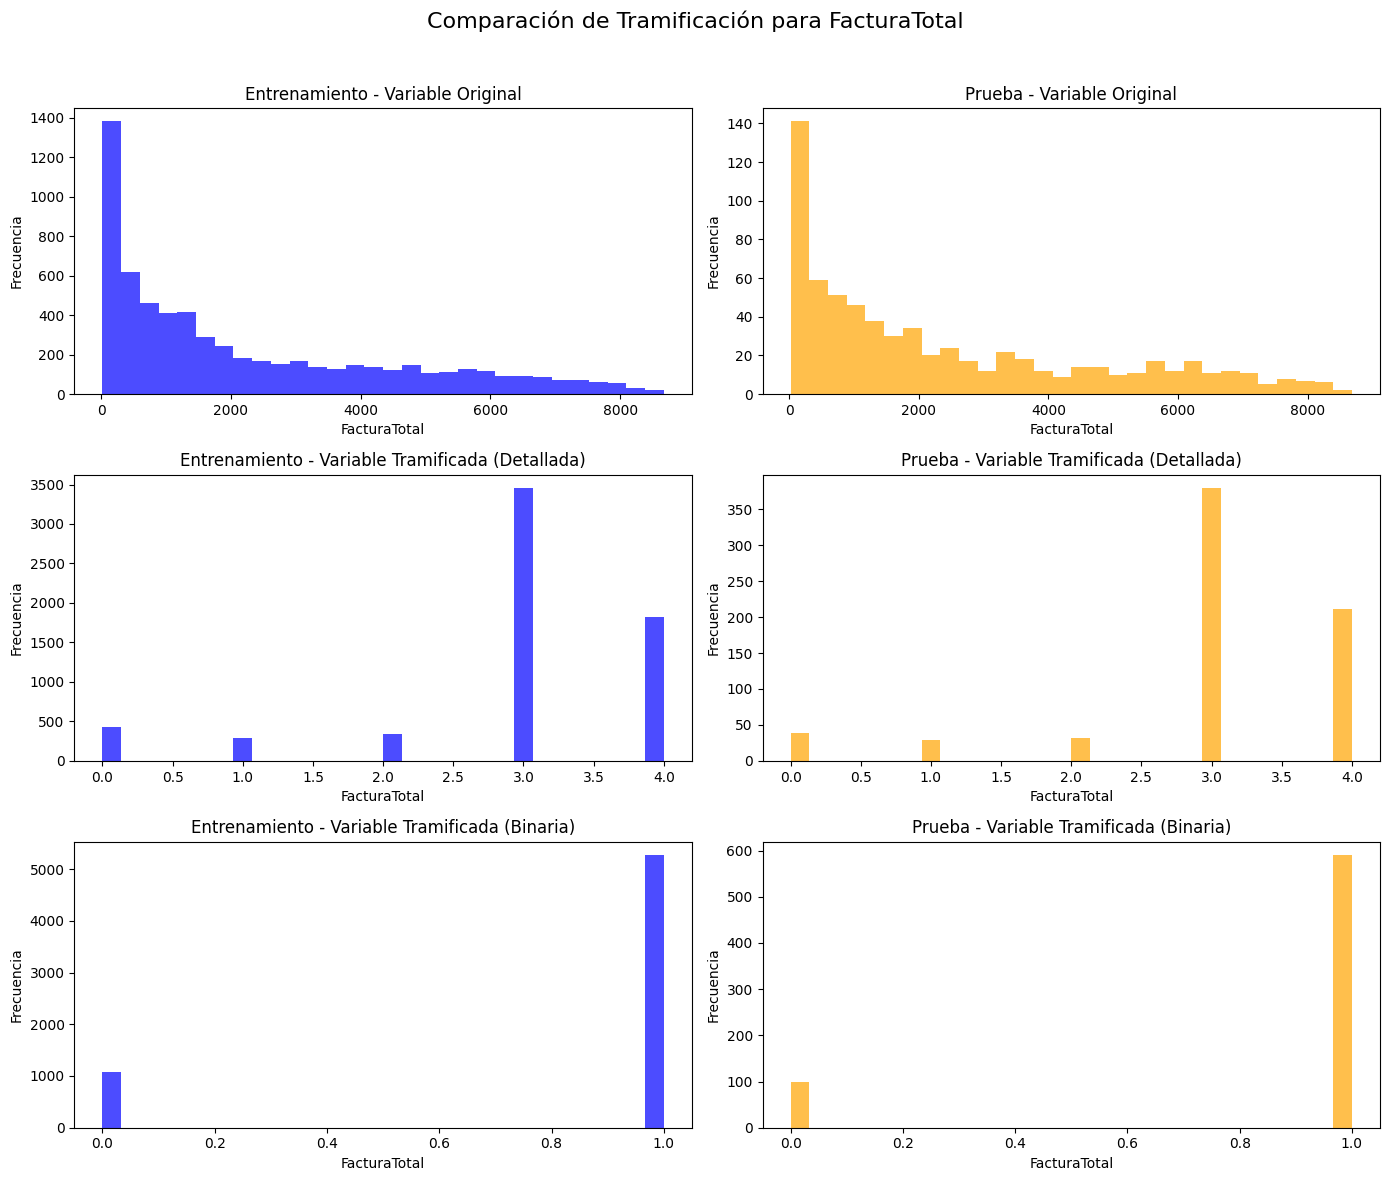

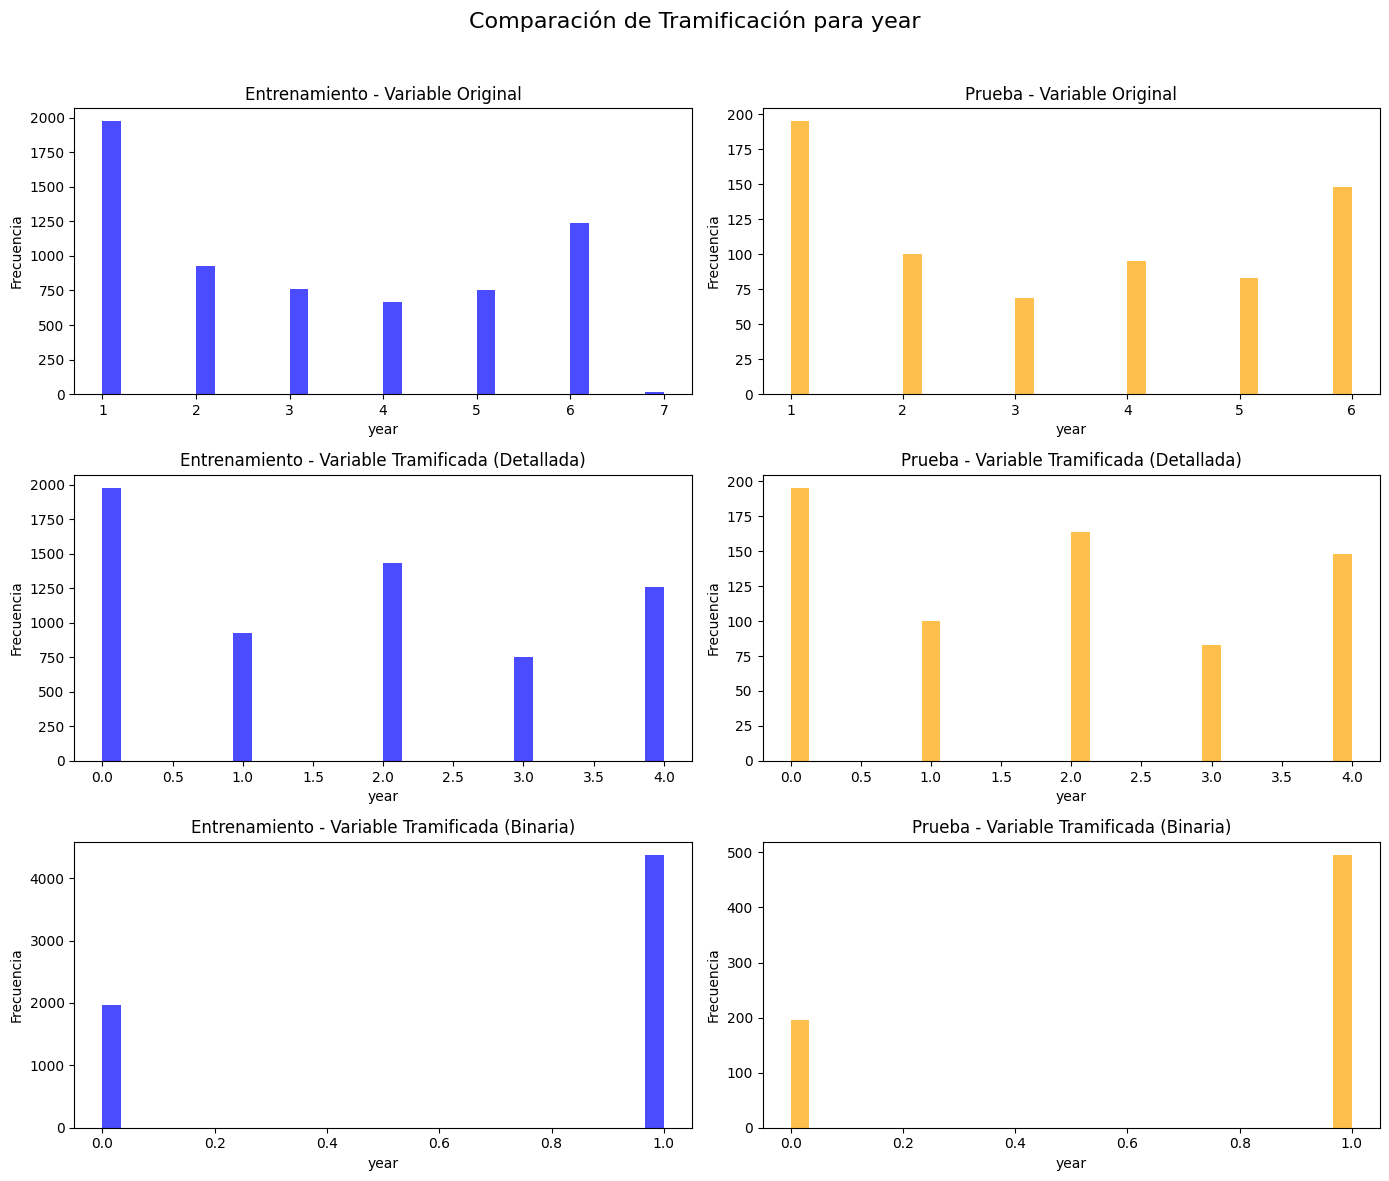

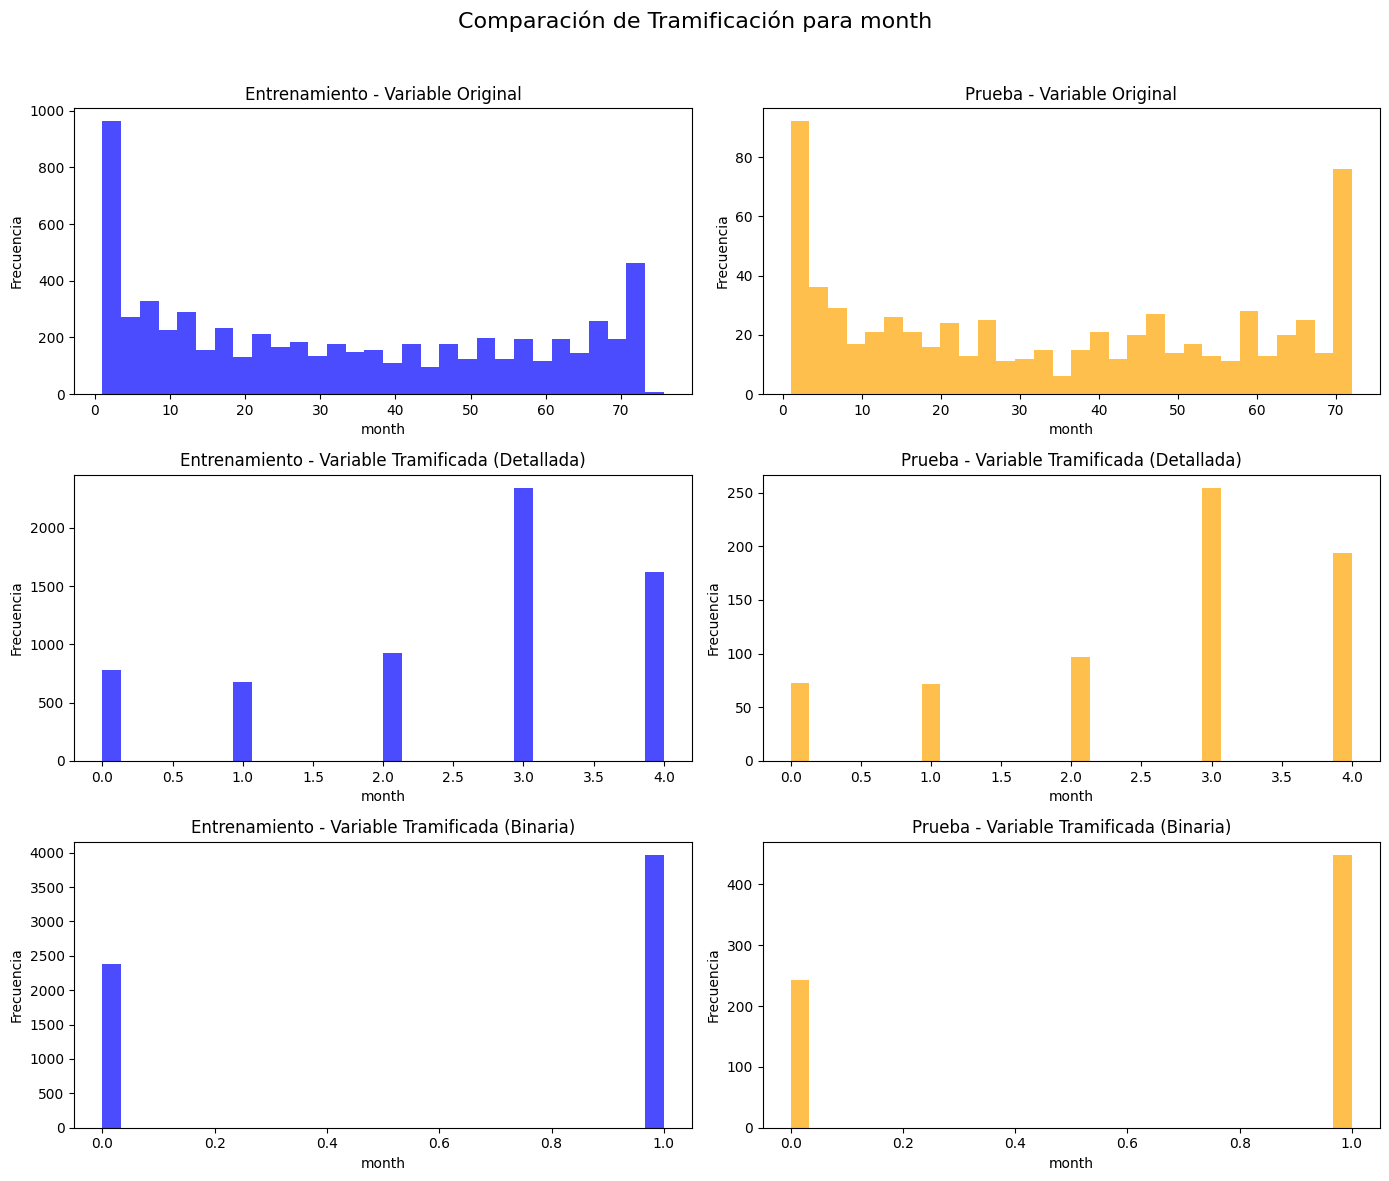

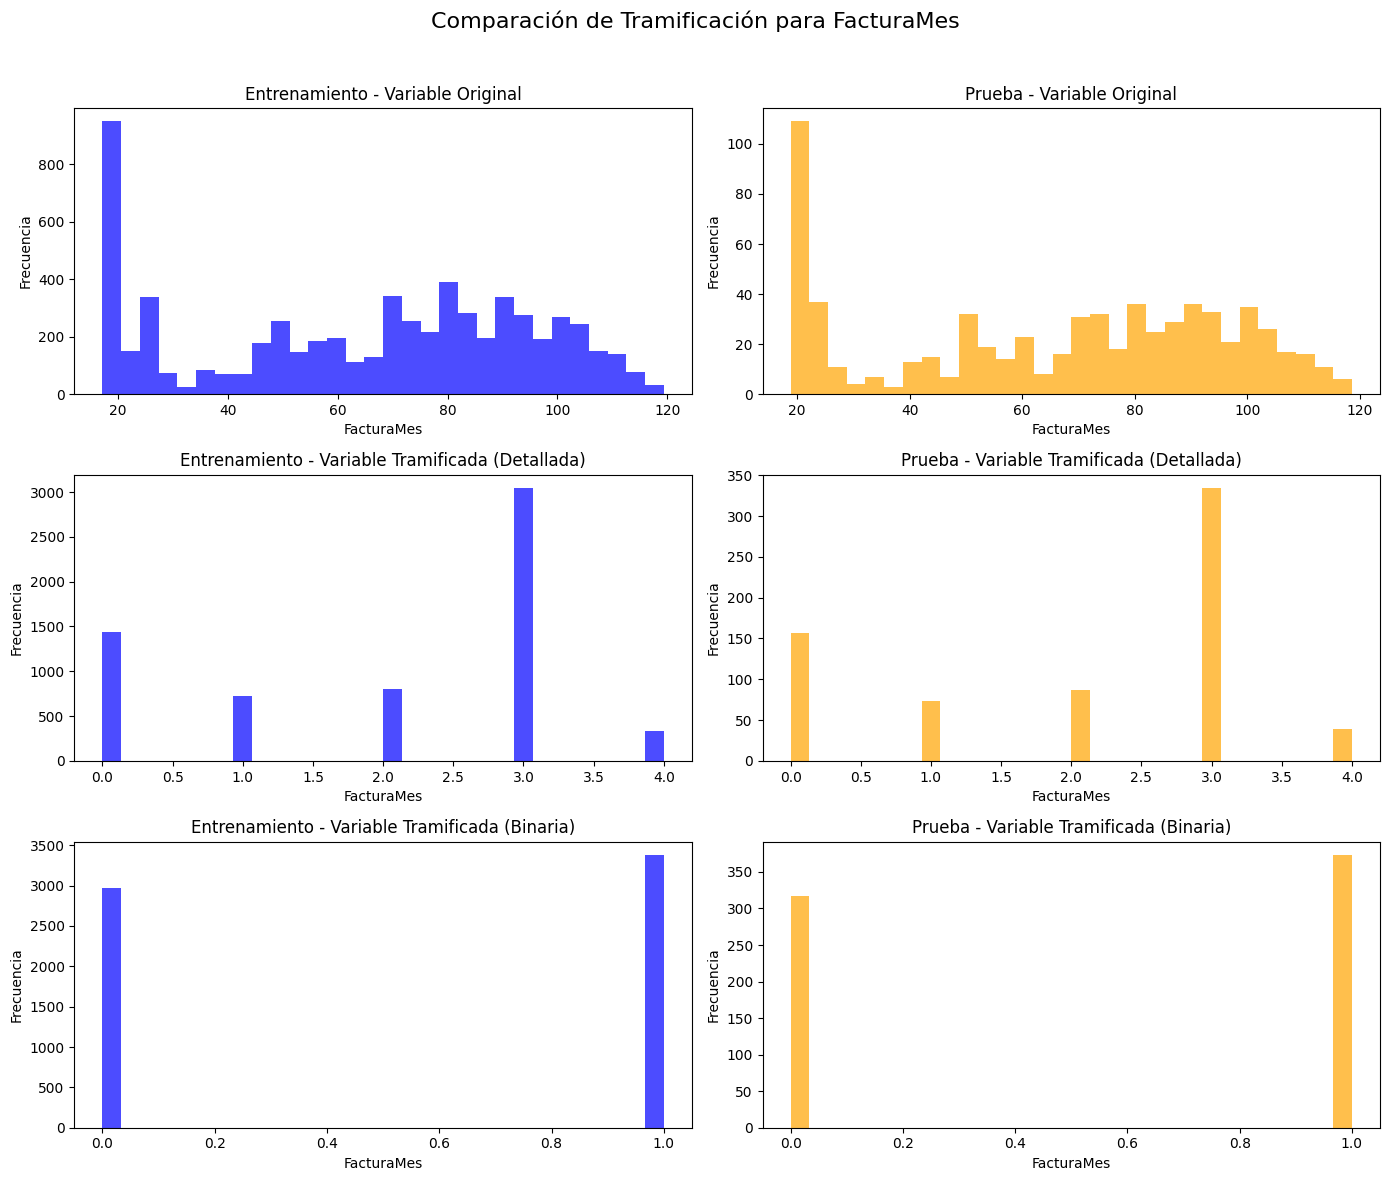

In [73]:
# Llama a la función para cada variable
for var in variables:
    plot_binning_comparison(clientes_binned, test_binned, var, var + '_binned_detailed', var + '_binned_binary')

Todo correcto parece.

In [74]:
# Lista de columnas con menos de 10 valores distintos. Potenciales factores!
to_factor_training = list(clientes_binned.loc[:,clientes_binned.nunique() <= 10]);  
to_factor_test = list(test_binned.loc[:,test_binned.nunique() <= 10]);  

# Podemos cambiar el tipo de todas ellas a factor de una vez
clientes_binned[to_factor_training] = clientes_binned[to_factor_training].astype('category')
test_binned[to_factor_test] = test_binned[to_factor_test].astype('category')  

In [75]:
clientes_binned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6343 entries, 0 to 6352
Data columns (total 35 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   ID                                  6343 non-null   object  
 1   Fuga                                6343 non-null   category
 2   month                               6343 non-null   float64 
 3   FacturaMes                          6343 non-null   float64 
 4   FacturaTotal                        6343 non-null   float64 
 5   prop_missings                       6343 non-null   category
 6   Genero_Male                         6343 non-null   category
 7   Mayor65_1.0                         6343 non-null   category
 8   Conyuge_Yes                         6343 non-null   category
 9   PersCargo_Yes                       6343 non-null   category
 10  Telf_serv_Yes                       6343 non-null   category
 11  VariasLineas_Yes                   

In [76]:
test_binned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   ID                                  690 non-null    object  
 1   month                               690 non-null    float64 
 2   FacturaMes                          690 non-null    float64 
 3   FacturaTotal                        690 non-null    float64 
 4   prop_missings                       690 non-null    category
 5   Genero_Male                         690 non-null    category
 6   Mayor65_1.0                         690 non-null    category
 7   Conyuge_Yes                         690 non-null    category
 8   PersCargo_Yes                       690 non-null    category
 9   Telf_serv_Yes                       690 non-null    category
 10  VariasLineas_Yes                    690 non-null    category
 11  Int_serv_Fiber optic            

In [77]:
### Comprobacion de null_values 
null_values = clientes_binned.isnull().sum()
null_columns = null_values[null_values > 0]

print(null_columns)

Series([], dtype: int64)


Acabamos **binning** teniendo 8 variables más, unas cuantas en otro dataset llamado woe, que después lo unieremos al final

## Transformaciones de las variables continuas

Hizimos el análisis con la **V de Cramer**  y vimos que lo mejor era **month_raiz4**, **FacturaMes_log** y **FacturaTotal_raiz4**. 

Pasamos directamente a realizar las transformaciones

In [78]:
# Crear la variable `month_raiz4`
clientes_binned['month_raiz4'] = np.power(clientes_binned['month'], 1/4)

# Crear la variable `FacturaMes_log`
# Para evitar problemas con valores menores o iguales a 0, agregamos 1 antes de aplicar el logaritmo
clientes_binned['FacturaMes_log'] = np.log1p(clientes_binned['FacturaMes'])

# Crear la variable `FacturaTotal_raiz4`
clientes_binned['FacturaTotal_raiz4'] = np.power(clientes_binned['FacturaTotal'], 1/4)

In [79]:
# Crear la variable `month_raiz4`
test_binned['month_raiz4'] = np.power(test_binned['month'], 1/4)

# Crear la variable `FacturaMes_log`
# Para evitar problemas con valores menores o iguales a 0, agregamos 1 antes de aplicar el logaritmo
test_binned['FacturaMes_log'] = np.log1p(test_binned['FacturaMes'])

# Crear la variable `FacturaTotal_raiz4`
test_binned['FacturaTotal_raiz4'] = np.power(test_binned['FacturaTotal'], 1/4)

In [80]:
clientes_binned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6343 entries, 0 to 6352
Data columns (total 38 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   ID                                  6343 non-null   object  
 1   Fuga                                6343 non-null   category
 2   month                               6343 non-null   float64 
 3   FacturaMes                          6343 non-null   float64 
 4   FacturaTotal                        6343 non-null   float64 
 5   prop_missings                       6343 non-null   category
 6   Genero_Male                         6343 non-null   category
 7   Mayor65_1.0                         6343 non-null   category
 8   Conyuge_Yes                         6343 non-null   category
 9   PersCargo_Yes                       6343 non-null   category
 10  Telf_serv_Yes                       6343 non-null   category
 11  VariasLineas_Yes                   

In [81]:
### Comprobacion de null_values 
null_values = clientes_binned.isnull().sum()
null_columns = null_values[null_values > 0]

print(null_columns)

Series([], dtype: int64)


### Clustering

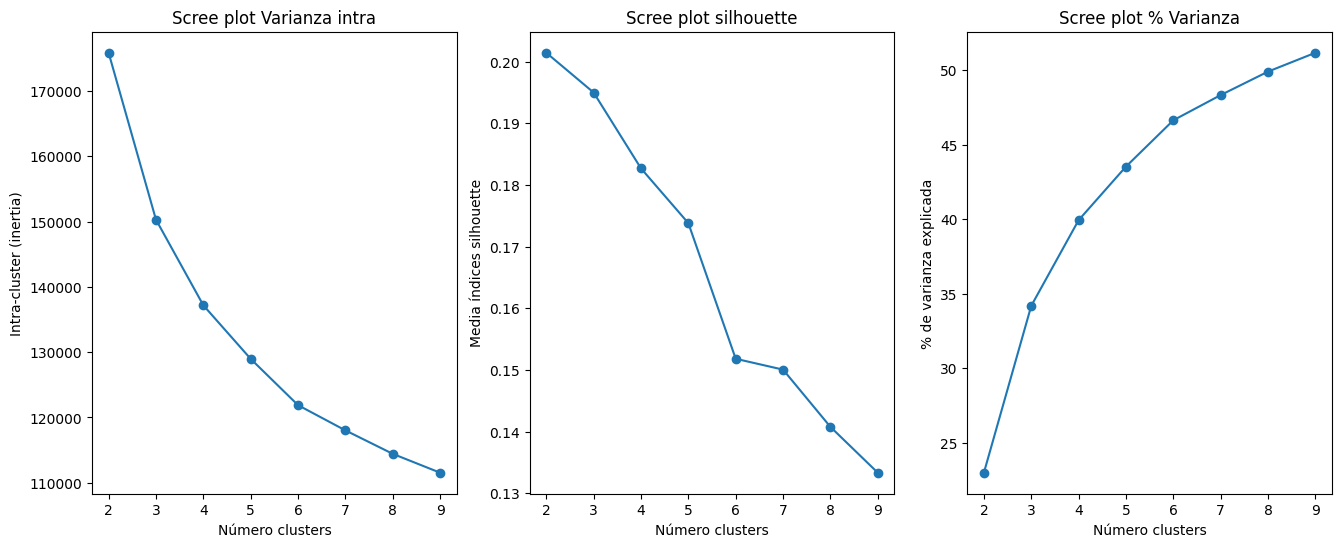

In [82]:
X_scaled = scale(clientes_binned.drop(columns=['ID', 'Fuga']))

scree_plot_kmeans(X_scaled,10)
plt.show()

In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering

X = clientes_binned.drop(columns=['ID', 'Fuga'])  # Excluyendo las columnas 'ID' y 'Fuga'
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

In [84]:
# Ajuste de modelos de clustering en los datos de entrenamiento
random_state = 9152

# Usar la semilla en K-Means para reproducibilidad
modelo_kmeans = KMeans(n_clusters=4, n_init=25, random_state=random_state)
modelo_kmeans.fit(X_scaled)
cluster_labels = modelo_kmeans.labels_


In [85]:
# Creación de la variable cluster en los datos de entrenamiento
clientes_binned = clientes_binned.copy()
clientes_binned['Cluster'] = cluster_labels.astype(int)
print(clientes_binned.head())

           ID Fuga      month  FacturaMes  FacturaTotal prop_missings  \
0  7590-VHVEG    0   1.000000   29.850000         29.85           2.0   
1  5575-GNVDE    0  34.000000   55.573529       1889.50           1.0   
2  3668-QPYBK    1   2.000000   53.850000        108.15           0.0   
3  7795-CFOCW    0  45.000000   42.300000       1840.75           2.0   
4  9237-HQITU    1   2.144979   70.700000        151.65           1.0   

  Genero_Male Mayor65_1.0 Conyuge_Yes PersCargo_Yes  ... year_binned_detailed  \
0         0.0         0.0         1.0           0.0  ...                    0   
1         1.0         0.0         0.0           0.0  ...                    2   
2         1.0         0.0         0.0           0.0  ...                    0   
3         0.0         0.0         0.0           0.0  ...                    2   
4         0.0         0.0         0.0           0.0  ...                    0   

  year_binned_binary month_binned_detailed month_binned_binary  \
0       

Ahora aplico la variable **Cluster** al **test**

In [86]:
# Supongamos que 'test' es tu conjunto de datos de prueba
X_test = test_binned.drop(columns=['ID'])  # Asegúrate de que las columnas sean las mismas que en el conjunto de entrenamiento, excepto 'ID'
X_test_scaled = scaler.transform(X_test)  # Escalar los datos de prueba usando el mismo escalador

# Predecir los clusters en los datos de prueba utilizando el modelo K-Means ajustado
test_binned = test_binned.copy()
test_binned['Cluster'] = modelo_kmeans.predict(X_test_scaled)
print(test_binned.head())

           ID  month  FacturaMes  FacturaTotal prop_missings Genero_Male  \
0  4183-MYFRB   21.0       90.05       1862.90           0.0         0.0   
1  8779-QRDMV    1.0       39.65         39.65           0.0         1.0   
2  1680-VDCWW   12.0       19.80        202.25           0.0         1.0   
3  6234-RAAPL   72.0       99.90       7251.70           0.0         0.0   
4  9867-JCZSP   17.0       20.75        418.25           0.0         0.0   

  Mayor65_1.0 Conyuge_Yes PersCargo_Yes Telf_serv_Yes  ...  \
0         0.0         0.0           0.0           1.0  ...   
1         0.0         0.0           0.0           0.0  ...   
2         0.0         1.0           0.0           1.0  ...   
3         0.0         1.0           1.0           1.0  ...   
4         0.0         1.0           1.0           1.0  ...   

  year_binned_detailed year_binned_binary month_binned_detailed  \
0                    1                  1                     3   
1                    0              

Hago una visualización rápida de que esta todo bien representado. 

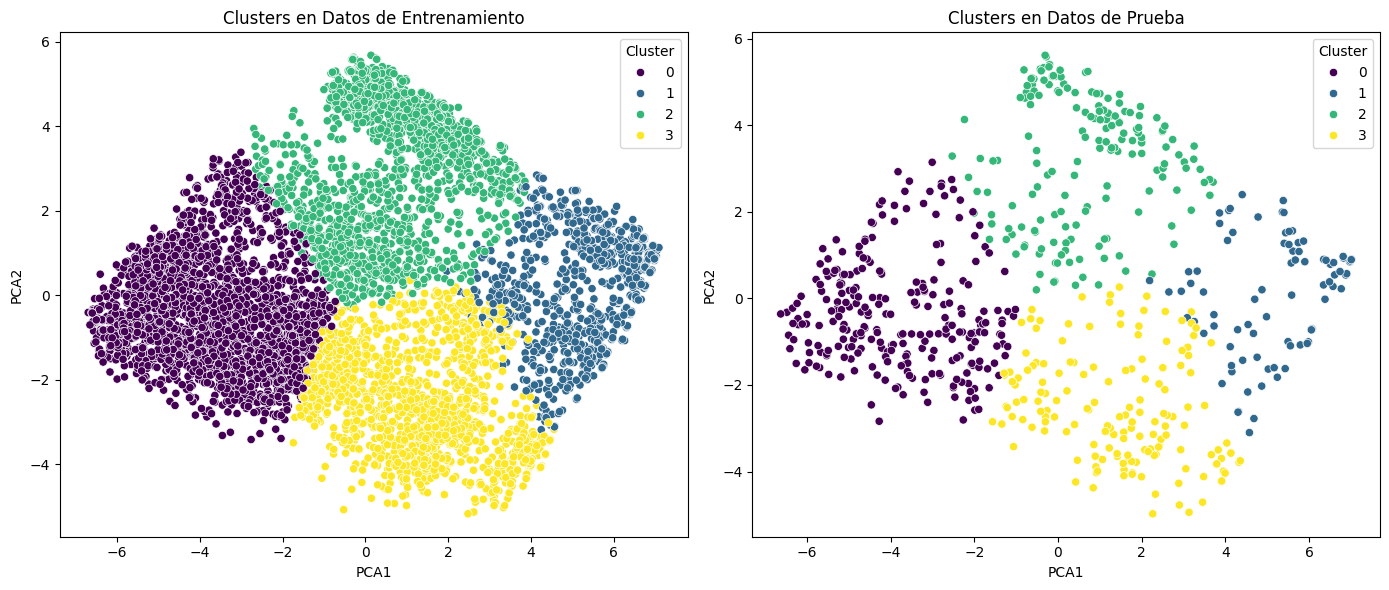

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reducir dimensionalidad para visualización
pca = PCA(n_components=2)
train_pca = pca.fit_transform(X_scaled)
test_pca = pca.transform(X_test_scaled)

clientes_binned['PCA1'] = train_pca[:, 0]
clientes_binned['PCA2'] = train_pca[:, 1]
test_binned['PCA1'] = test_pca[:, 0]
test_binned['PCA2'] = test_pca[:, 1]

# Visualización de los clusters en los datos de entrenamiento
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=clientes_binned, palette='viridis')
plt.title('Clusters en Datos de Entrenamiento')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

# Visualización de los clusters en los datos de prueba
plt.subplot(1, 2, 2)
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=test_binned, palette='viridis')
plt.title('Clusters en Datos de Prueba')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

plt.tight_layout()
plt.show()


Lo damos por valido, se parecen bastante. 

In [88]:
### Comprobacion de null_values 
null_values = test_binned.isnull().sum()
null_columns = null_values[null_values > 0]

print(null_columns)

Series([], dtype: int64)


In [89]:
clientes_binned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6343 entries, 0 to 6352
Data columns (total 41 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   ID                                  6343 non-null   object  
 1   Fuga                                6343 non-null   category
 2   month                               6343 non-null   float64 
 3   FacturaMes                          6343 non-null   float64 
 4   FacturaTotal                        6343 non-null   float64 
 5   prop_missings                       6343 non-null   category
 6   Genero_Male                         6343 non-null   category
 7   Mayor65_1.0                         6343 non-null   category
 8   Conyuge_Yes                         6343 non-null   category
 9   PersCargo_Yes                       6343 non-null   category
 10  Telf_serv_Yes                       6343 non-null   category
 11  VariasLineas_Yes                   

Borramos **PCA1** y **PCA2** ya que aqui solo lo queriamos para representar. Prefiero hacer ahora un analisis aparte para los PCA.

In [90]:
clientes_binned = clientes_binned.drop(['PCA1', 'PCA2'], axis=1)

In [91]:
test_binned = test_binned.drop(['PCA1', 'PCA2'], axis=1)

#### **PCA**

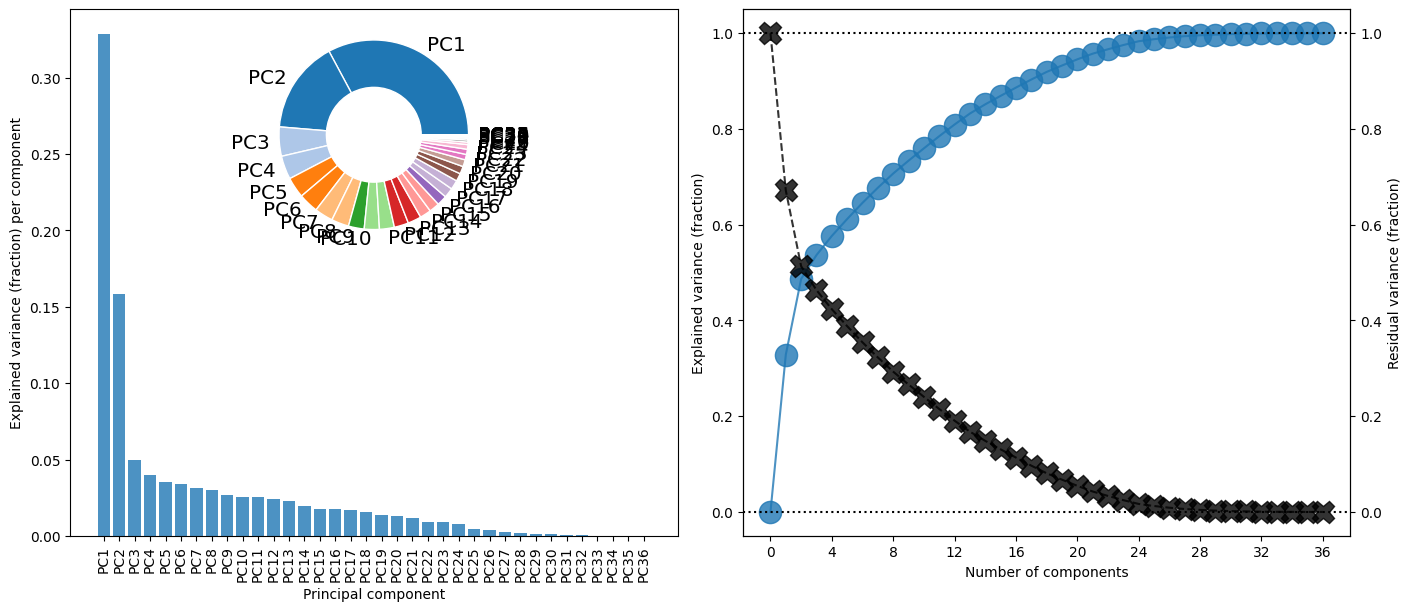

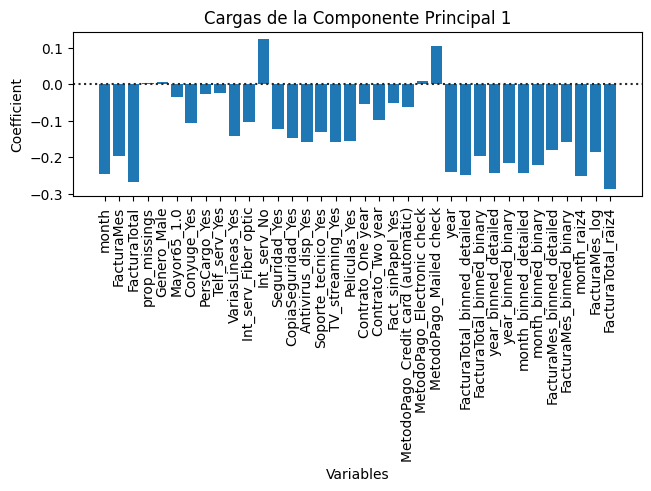

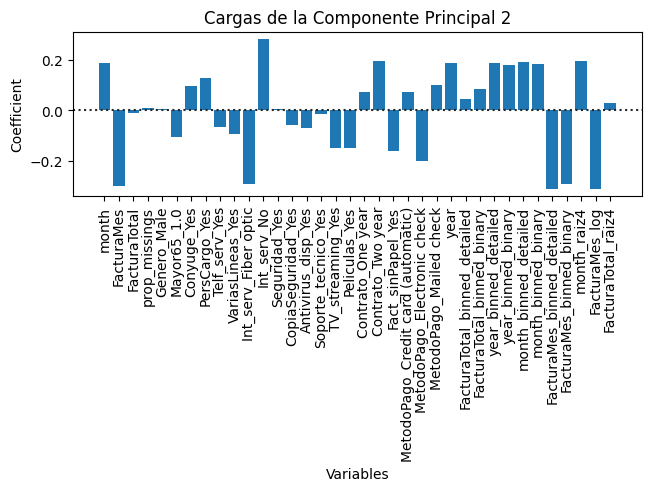

Varianza explicada por PC1: 0.33
Varianza explicada por PC2: 0.16


In [92]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from psynlig import (
    pca_explained_variance,
    pca_residual_variance,
    pca_explained_variance_bar,
    pca_explained_variance_pie,
    pca_1d_loadings,
    pca_2d_loadings,
    pca_2d_scores
)

clientes_binned_explicativas = clientes_binned.drop(columns=['ID', 'Fuga', 'Cluster'])

# Escalado de datos
scaler = StandardScaler()
scaler.fit(clientes_binned_explicativas)
X_scaled = scaler.transform(clientes_binned_explicativas)

# Ajuste PCA
pca = PCA()
scores = pca.fit_transform(X_scaled)

fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2, figsize=(14, 6), constrained_layout=True
)
pca_explained_variance_bar(pca, axi=ax1, alpha=0.8)

pca_explained_variance(pca, axi=ax2, marker='o', markersize=16, alpha=0.8)

ax4 = ax2.twinx()
pca_residual_variance(
    pca,
    ax4,
    marker='X',
    markersize=16,
    alpha=0.8,
    color='black',
    linestyle='--'
)

ax3 = inset_axes(ax1, width='45%', height='45%', loc=9)
pca_explained_variance_pie(pca, axi=ax3, cmap='tab20')

plt.show()


# Visualizar las cargas de PCA para la componente principal 1
pca_1d_loadings(
    pca,
    clientes_binned_explicativas.columns,
    select_components={1},  # Componente principal 1
    plot_type='bar'
)
plt.title('Cargas de la Componente Principal 1')
plt.show()

# Visualizar las cargas de PCA para la componente principal 2
pca_1d_loadings(
    pca,
    clientes_binned_explicativas.columns,
    select_components={2},  # Componente principal 2
    plot_type='bar'
)
plt.title('Cargas de la Componente Principal 2')
plt.show()

# Interpretación inicial de las componentes principales
explained_variance = pca.explained_variance_ratio_
print(f"Varianza explicada por PC1: {explained_variance[0]:.2f}")
print(f"Varianza explicada por PC2: {explained_variance[1]:.2f}")

In [93]:
clientes_binned['PC1'] = scores[:, 0]
clientes_binned['PC2'] = scores[:, 1]

In [94]:
clientes_binned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6343 entries, 0 to 6352
Data columns (total 41 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   ID                                  6343 non-null   object  
 1   Fuga                                6343 non-null   category
 2   month                               6343 non-null   float64 
 3   FacturaMes                          6343 non-null   float64 
 4   FacturaTotal                        6343 non-null   float64 
 5   prop_missings                       6343 non-null   category
 6   Genero_Male                         6343 non-null   category
 7   Mayor65_1.0                         6343 non-null   category
 8   Conyuge_Yes                         6343 non-null   category
 9   PersCargo_Yes                       6343 non-null   category
 10  Telf_serv_Yes                       6343 non-null   category
 11  VariasLineas_Yes                   

In [95]:
clientes_binned.head()

,ID,Fuga,month,FacturaMes,FacturaTotal,prop_missings,Genero_Male,Mayor65_1.0,Conyuge_Yes,PersCargo_Yes,...,month_binned_detailed,month_binned_binary,FacturaMes_binned_detailed,FacturaMes_binned_binary,month_raiz4,FacturaMes_log,FacturaTotal_raiz4,Cluster,PC1,PC2
0,7590-VHVEG,0,1.000000,29.850000,29.85,2.0,0.0,0.0,1.0,0.0,...,0,0,1,0,1.000000,3.429137,2.337416,1,5.530074,-0.606946
1,5575-GNVDE,0,34.000000,55.573529,1889.50,1.0,1.0,0.0,0.0,0.0,...,3,1,2,0,2.414736,4.035541,6.593055,2,0.098192,1.636773
2,3668-QPYBK,1,2.000000,53.850000,108.15,0.0,1.0,0.0,0.0,0.0,...,0,0,2,0,1.189207,4.004602,3.224829,1,4.484017,-1.396755
3,7795-CFOCW,0,45.000000,42.300000,1840.75,2.0,0.0,0.0,0.0,0.0,...,3,1,1,0,2.590020,3.768153,6.550112,2,-0.359275,2.319057
4,9237-HQITU,1,2.144979,70.700000,151.65,1.0,0.0,0.0,0.0,0.0,...,0,0,3,1,1.210196,4.272491,3.509220,3,3.912444,-3.645558


Aplico las **cargas** del train al **test**

In [96]:
# Preparar los datos de prueba
test_explicativas = test_binned.drop(columns=['ID', 'Cluster'])  # Excluir 'ID' y 'Cluster'
    
# Asegúrate de que las columnas en los datos de prueba coincidan con los datos de entrenamiento
test_explicativas = test_explicativas.reindex(columns=clientes_binned_explicativas.columns, fill_value=0)
    
# Escalar los datos de prueba utilizando el mismo escalador ajustado en los datos de entrenamiento
X_test_scaled = scaler.transform(test_explicativas)
    
# Transformar los datos de prueba utilizando el mismo modelo PCA ajustado en los datos de entrenamiento
test_scores = pca.transform(X_test_scaled)
    
# Agregar las componentes principales al DataFrame de prueba
test_binned['PC1'] = test_scores[:, 0]
test_binned['PC2'] = test_scores[:, 1]


In [97]:
test_binned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 40 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   ID                                  690 non-null    object  
 1   month                               690 non-null    float64 
 2   FacturaMes                          690 non-null    float64 
 3   FacturaTotal                        690 non-null    float64 
 4   prop_missings                       690 non-null    category
 5   Genero_Male                         690 non-null    category
 6   Mayor65_1.0                         690 non-null    category
 7   Conyuge_Yes                         690 non-null    category
 8   PersCargo_Yes                       690 non-null    category
 9   Telf_serv_Yes                       690 non-null    category
 10  VariasLineas_Yes                    690 non-null    category
 11  Int_serv_Fiber optic            

Hago una comprobación si se han aplicado bien las cargas y cerramos la depuración.

In [98]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Preparación de datos de entrenamiento
clientes_binned_explicativas = clientes_binned.drop(columns=['ID', 'Fuga', 'Cluster'])

# Escalado de datos
scaler = StandardScaler()
scaler.fit(clientes_binned_explicativas)
X_scaled = scaler.transform(clientes_binned_explicativas)

# Ajuste PCA
pca = PCA()
scores = pca.fit_transform(X_scaled)

# Guardar las cargas del PCA ajustado
loadings_train = pca.components_.T

# Mostrar las cargas del PCA ajustado
print("Cargas del PCA ajustado en el conjunto de entrenamiento:")
print(loadings_train)


Cargas del PCA ajustado en el conjunto de entrenamiento:
[[-2.36230294e-01  1.72090633e-01 -3.44210284e-02 ... -2.39413131e-01
   9.95765983e-02  0.00000000e+00]
 [-1.89232792e-01 -2.75586875e-01  1.27511113e-02 ... -1.01919866e-01
  -4.55858622e-02  1.19476588e-01]
 [-2.56441677e-01 -7.64701145e-03  4.08171139e-02 ...  2.20909404e-01
   4.91370024e-02  5.61957128e-02]
 ...
 [-2.75305591e-01  2.71429171e-02 -2.48199905e-02 ... -6.36143058e-01
   6.34701175e-02  5.01132856e-02]
 [ 2.79255556e-01  1.13865314e-16  7.71951947e-17 ... -2.37657116e-16
   6.62491219e-01  6.95069578e-01]
 [ 4.50367213e-17  3.86331022e-01 -2.49800181e-16 ... -1.08246745e-15
  -6.67666412e-01  6.36372457e-01]]


In [99]:
# Preparación de datos de prueba
test_explicativas = test_binned.drop(columns=['ID', 'Cluster'])

# Asegurarse de que las columnas en los datos de prueba coincidan con los datos de entrenamiento
test_explicativas = test_explicativas.reindex(columns=clientes_binned_explicativas.columns, fill_value=0)

# Escalar los datos de prueba utilizando el mismo escalador ajustado en los datos de entrenamiento
X_test_scaled = scaler.transform(test_explicativas)

# Transformar los datos de prueba utilizando el mismo modelo PCA ajustado en los datos de entrenamiento
test_scores = pca.transform(X_test_scaled)

# Guardar las cargas del PCA aplicado al conjunto de prueba (que deberían ser las mismas)
loadings_test = pca.components_.T

# Comprobar que las cargas son iguales
cargas_iguales = (loadings_train == loadings_test).all()

print(f"¿Las cargas del PCA son iguales entre el conjunto de entrenamiento y el conjunto de prueba? {cargas_iguales}")


¿Las cargas del PCA son iguales entre el conjunto de entrenamiento y el conjunto de prueba? True


In [100]:
### Comprobacion de null_values 
null_values = clientes_binned.isnull().sum()
null_columns = null_values[null_values > 0]

print(null_columns)

Series([], dtype: int64)


### Fusion dataset con los de woe

In [110]:
test_woe.columns = test_woe.columns + '_WOE'

test_woe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   month_WOE                               690 non-null    float64
 1   FacturaMes_WOE                          690 non-null    float64
 2   FacturaTotal_WOE                        690 non-null    float64
 3   Mayor65_1.0_WOE                         690 non-null    float64
 4   Conyuge_Yes_WOE                         690 non-null    float64
 5   PersCargo_Yes_WOE                       690 non-null    float64
 6   Int_serv_Fiber optic_WOE                690 non-null    float64
 7   Int_serv_No_WOE                         690 non-null    float64
 8   Seguridad_Yes_WOE                       690 non-null    float64
 9   CopiaSeguridad_Yes_WOE                  690 non-null    float64
 10  Antivirus_disp_Yes_WOE                  690 non-null    float6

In [111]:
clientes_final = clientes_binned.merge(clientes_woe, left_index=True, right_index=True)

test_final = test_binned.merge(test_woe, left_index=True, right_index=True)


In [112]:
# Podemos cambiar el tipo de todas ellas a factor de una vez

clientes_final = clientes_final.apply(lambda x: x.astype('uint8') if x.dtype in ['int', 'category'] else (x.astype('float32') if x.dtype == 'float' else x))

test_final = test_final.apply(lambda x: x.astype('uint8') if x.dtype in ['int', 'category'] else (x.astype('float32') if x.dtype == 'float' else x))



In [113]:
clientes_final.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 6343 entries, 0 to 6352
Data columns (total 60 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ID                                      6343 non-null   object 
 1   Fuga                                    6343 non-null   uint8  
 2   month                                   6343 non-null   float32
 3   FacturaMes                              6343 non-null   float32
 4   FacturaTotal                            6343 non-null   float32
 5   prop_missings                           6343 non-null   uint8  
 6   Genero_Male                             6343 non-null   uint8  
 7   Mayor65_1.0                             6343 non-null   uint8  
 8   Conyuge_Yes                             6343 non-null   uint8  
 9   PersCargo_Yes                           6343 non-null   uint8  
 10  Telf_serv_Yes                           6343 non-null   uint8  
 

In [114]:
test_final.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 59 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ID                                      690 non-null    object 
 1   month                                   690 non-null    float32
 2   FacturaMes                              690 non-null    float32
 3   FacturaTotal                            690 non-null    float32
 4   prop_missings                           690 non-null    uint8  
 5   Genero_Male                             690 non-null    uint8  
 6   Mayor65_1.0                             690 non-null    uint8  
 7   Conyuge_Yes                             690 non-null    uint8  
 8   PersCargo_Yes                           690 non-null    uint8  
 9   Telf_serv_Yes                           690 non-null    uint8  
 10  VariasLineas_Yes                        690 non-null    uint8 

Hay que arreglar el tema de los espacios y que en el test aparece "_y" que se haría en algun proceso anterior

In [115]:
clientes_final.columns = clientes_final.columns.str.replace(' ', '_')
test_final.columns = test_final.columns.str.replace(' ', '_')


In [117]:
# Obtener columnas que están en clientes pero no en test
columnas_unicas_clientes = set(clientes_final.columns) - set(test_final.columns)

# Obtener columnas que están en test pero no en clientes
columnas_unicas_test = set(test_final.columns) - set(clientes_final.columns)

# Imprimir los resultados
print("Columnas en clientes pero no en test:", columnas_unicas_clientes)
print("Columnas en test pero no en clientes:", columnas_unicas_test)

Columnas en clientes pero no en test: {'Fuga'}
Columnas en test pero no en clientes: set()


TERMINADA LA **DEPURACIÓN** DE LA SIGUIENTE MANERA: 

- Borrado de variables con | Antiguedad = 0 | (11 registros borrados)
- Imputado con la fórmula de | FacturaTotal =  FacturaMes * Antiguedad |  todo lo que he podido
- Imputado el resto con KNN
- Tramificado con WOE
- Tramificado las variables continuas a categóricas
- Tramificado las variables continuas a binarias
- Transformaciones de las 3 variables continuas
- Crear variable cluster con k = 4
- Crear variable PC1 y PC2 de componentes principales. 

### Guardar Dataset

In [118]:
clientes_final.to_hdf('DatosFinal_Train.h5',key='df',format='table')

clientes=pd.read_hdf('DatosFinal_Train.h5','df')
clientes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6343 entries, 0 to 6352
Data columns (total 60 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ID                                      6343 non-null   object 
 1   Fuga                                    6343 non-null   uint8  
 2   month                                   6343 non-null   float32
 3   FacturaMes                              6343 non-null   float32
 4   FacturaTotal                            6343 non-null   float32
 5   prop_missings                           6343 non-null   uint8  
 6   Genero_Male                             6343 non-null   uint8  
 7   Mayor65_1.0                             6343 non-null   uint8  
 8   Conyuge_Yes                             6343 non-null   uint8  
 9   PersCargo_Yes                           6343 non-null   uint8  
 10  Telf_serv_Yes                           6343 non-null   uint8  
 

In [119]:
test_final.to_hdf('DatosFinal_Test.h5',key='df',format='table')

clientes=pd.read_hdf('DatosFinal_Test.h5','df')
clientes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 690 entries, 0 to 689
Data columns (total 59 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ID                                      690 non-null    object 
 1   month                                   690 non-null    float32
 2   FacturaMes                              690 non-null    float32
 3   FacturaTotal                            690 non-null    float32
 4   prop_missings                           690 non-null    uint8  
 5   Genero_Male                             690 non-null    uint8  
 6   Mayor65_1.0                             690 non-null    uint8  
 7   Conyuge_Yes                             690 non-null    uint8  
 8   PersCargo_Yes                           690 non-null    uint8  
 9   Telf_serv_Yes                           690 non-null    uint8  
 10  VariasLineas_Yes                        690 non-null    uint8  
 11